# Тестовое задание по теме "Анализ данных и построение предиктивной модели"
Подготовил: *Асташёнок Михаил*
<br>Контактные данные:
- e-mail: thenaitrise@gmail.com
- vk.com / telegram / github: @mikeasta

**Цель тестового задания:** оценка логичного и верного прохождения этапов анализа данных испытуемого.

**Условие задания:**
<br> Предоставляется *датасет с резюме программистов*: https://disk.yandex.ru/d/VW0MjcyQ07AOdg. Для выполнения задания необходимо:

1. Загрузить датасет с резюме программистов и провести предварительный анализ данных. Включить в анализ следующие шаги:
- Ознакомление с общей структурой и содержанием данных.<br>
- Проверка наличия пропущенных значений и принятие решения, как с ними работать.<br>
- Изучение распределения данных в различных атрибутах (например, опыт работы, образование и т.д.)<br>

2. Провести предобработку данных:
- Применение необходимых методов для обработки пропущенных значений.<br>
- Создание новых признаков (при необходимости).<br>

3. Создание модели прогнозирования, которая будет предсказывать **уровень желаемой зарплаты (столбец `salary` в датасет)**.<br>

4. Провести анализ полученных результатов:
- Оценка качества модели машинного обучения по выбранным метрикам.<br>
- Формирование выводов о том какие факторы обладают наибольшим влиянием на уровень зарплаты.<br>

5. Подготовить отчет или Jupyter Notebook, демонстрирующий код, результаты и выводы.<br>

**Комментарии от испытуемого по выполнению задания**:
1. Отсутствует полная информация о датасете: откуда он был собран, назначение переменных и т.д. - все это неизвестно. У меня был лишь сам датасет, соответственно, все умозаключения ниже основаны лишь на данных из датасета.
2. Проведение анализа и построение модели машинного обучения производится в Jupyter Notebook, написание документа - в Visual Studio Code.
3. Документ поделен на главы, которые в свою очередь поеделены на части/подглавы, для более комфортной навигации по работе.

# Выполнение задания
Времязатраты на выполнение задания: **~ 12 ч. 00 мин.**

## Исследование датасета
Первым делом проведем анализ исследуемого датасета: изучим его содержимое, проверим его на наличие неожиданных/неадекватных/пропущенных данных, поймем, что скрывается за каждым признаком.

### Загрузка модулей и датасета
Импортируем необходимые модули.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Версия Pandas: {pd.__version__}")
print(f"Версия Numpy: {np.__version__}")
print(f"Версия Seaborn: {sns.__version__}")

RANDOM_SEED = 42

Версия Pandas: 2.0.2
Версия Numpy: 1.25.0
Версия Seaborn: 0.12.2


Выгрузим датасет из [Яндекс.Диск](https://disk.yandex.ru/d/VW0MjcyQ07AOdg/cv_programmers.csv)

In [2]:
programmers_df = pd.read_csv("cv_programmers.csv", index_col=0, encoding="windows-1251") # windows-1251 - кодировщик, поддерживающий кириллицу.

### Знакомство с датасетом

Взглянем на первые несколько строк датасета, чтобы сформировать первичное представление о полученных данных

In [3]:
programmers_df.head()

,id,abilympics_inspection_status,abilympics_participation,worldskills_inspection_status,state_region_code,regionNameTerm,position_name,date_create,date_modify,home_city_code,...,workExperienceList,educationList,additionalEducationList,desirableRelocationRegions,contactList,worldskills,languageKnowledge,hardSkills,softSkills,localityName
44,02f70fc0-5142-11ec-b050-1b29d3b53cbb,UNKNOWN,False,NOT_APPLICABLE,6100000000000,NaN,Техник-программист,2021-11-29T21:27:30+0300,2021-11-29T21:29:16+0300,6100000100000,...,"[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[],"Ростовская-область,-г.-Ростов-на-Дону"
54,02f6df20-3b3d-11ec-a60c-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,7800000000000,NaN,Программист,2021-11-01T20:56:17+0300,2021-11-28T19:12:25+0300,7800000000000,...,"[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[],г.-Санкт-Петербург
294,02efefb0-0e43-11ed-81ab-7fb917d16256,UNKNOWN,False,NOT_APPLICABLE,5600000000000,NaN,Программист,2022-07-28T10:00:49+0300,2022-07-29T10:30:56+0300,5600000200000,...,"[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d...","Оренбургская-область,-г.-Медногорск"
415,02ec5b90-658a-11ed-8193-e57b87a63fa7,UNKNOWN,False,NOT_APPLICABLE,1600000000000,NaN,Программист,2022-11-16T11:38:14+0300,2022-11-16T11:38:14+0300,1600000100000,...,[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[],"Республика-Татарстан,-г.-Казань"
689,029ebe60-e0d0-11ec-a466-839f0d9a4379,UNKNOWN,False,NOT_APPLICABLE,5700000000000,NaN,Техник-программист,2022-05-31T13:54:14+0300,2022-05-31T13:56:04+0300,5701700100000,...,[],"[{""diploma_name"": ""Разработка системы дистанци...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9...","Орловская-область,-г.-Новосиль"


Изучим описательные характеристики загруженного датасета

In [4]:
print(f"Размер датасета: {programmers_df.shape}") 
print(f"Признаки: {programmers_df.columns}")

Размер датасета: (425, 47)
Признаки: Index(['id', 'abilympics_inspection_status', 'abilympics_participation',
       'worldskills_inspection_status', 'state_region_code', 'regionNameTerm',
       'position_name', 'date_create', 'date_modify', 'home_city_code',
       'education', 'academic_degree', 'drive_license', 'code_country',
       'nark_inspection_status', 'nark_certificate', 'published_date',
       'schedule_type', 'experience', 'salary', 'professional_skills',
       'add_skills', 'busy_type', 'business_trip', 'id_candidate',
       'other_certificates', 'retraining_capability', 'other_info', 'id_user',
       'publication_period', 'rf_citizen', 'status', 'visibility',
       'code_external_system', 'deleted', 'fullness_rate', 'professionList',
       'workExperienceList', 'educationList', 'additionalEducationList',
       'desirableRelocationRegions', 'contactList', 'worldskills',
       'languageKnowledge', 'hardSkills', 'softSkills', 'localityName'],
      dtype='object')


Полученный датасет содержит в себе 425 наблюдений, каждый из которых содержит по 47 признаков (первый безымянный столбец в выгруженном датасете был отмечен как индексный столбец).

Изучим типы данных исследуемого датафрейма.

In [5]:
programmers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, 44 to 99955
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             425 non-null    object 
 1   abilympics_inspection_status   425 non-null    object 
 2   abilympics_participation       425 non-null    bool   
 3   worldskills_inspection_status  425 non-null    object 
 4   state_region_code              425 non-null    int64  
 5   regionNameTerm                 0 non-null      float64
 6   position_name                  425 non-null    object 
 7   date_create                    425 non-null    object 
 8   date_modify                    425 non-null    object 
 9   home_city_code                 425 non-null    int64  
 10  education                      367 non-null    object 
 11  academic_degree                0 non-null      float64
 12  drive_license                  425 non-null    objec

Как видно из данной таблицы, **в нашем датасете содержатся самые разные типы данных**. В датафрейме есть даты, списки (похожие на JSON-строки), логические типы, строки, целочисленные данные и данные с плавающей точкой и т.д. 

Изучим описательные характеристики числовых типов.

In [6]:
programmers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
state_region_code,425.0,4.487059e+12,2.501754e+12,1.000000e+11,2.300000e+12,5.000000e+12,6.600000e+12,9.100000e+12
regionNameTerm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_city_code,425.0,4.487466e+12,2.501793e+12,1.000002e+11,2.300000e+12,5.000003e+12,6.600001e+12,9.101200e+12
academic_degree,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,425.0,3.296471e+00,6.191642e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,5.200000e+01
salary,425.0,4.642684e+04,4.043247e+04,0.000000e+00,2.500000e+04,4.000000e+04,5.000000e+04,3.500000e+05
publication_period,425.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
code_external_system,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fullness_rate,425.0,6.689176e+01,1.433568e+01,0.000000e+00,6.100000e+01,6.700000e+01,7.500000e+01,1.000000e+02


Исходя из количества наблюдений в датасете и из данных о числовых типах выше, мы видим, что есть признаки, значение которых отсутствует для всех наблюдений. Не будем спешить удалять эти признаки из датасета в угоду минимализма, возможно мы потом заполним их полезными данными из других признаков. 

Остальные числовые признаки имеют значение для всех 425 наблюдений.

Стоит заметить, что **не все числовые переменные в нашем датасете являются количественными**: часть из них являются номинативными переменными, разделяющие наши наблюдения по коду региона, города и т.д.

### Определим назначение признаков
*Данный раздел можно пропустить, т.к. это моя попытка выяснить смысл каждого из признаков, и можно сразу перейти к разделу по "Подготовке датасета для анализа"*.

Исследуемый датасет содержит в себе 47 признаков, которые описывают наблюдаемых программистов. К датасету не был предложен мануал с перечислением и назначением признаков, поэтому определить смысл переменных необходимо самому, исходя из их названия и содержимого.

Это необходимо, чтобы суметь обнаружить "историю", скрывающуюся в наших данных, понять взаимосвязь наших переменных с точки зрения здравого смысла, подготовить наш датасет, убрать лишнее, провести анализ данных, обучить модель и сделать вывод о том, как сильно те или иные признаки влияют на наши данные. 

In [7]:
programmers_df.columns

Index(['id', 'abilympics_inspection_status', 'abilympics_participation',
       'worldskills_inspection_status', 'state_region_code', 'regionNameTerm',
       'position_name', 'date_create', 'date_modify', 'home_city_code',
       'education', 'academic_degree', 'drive_license', 'code_country',
       'nark_inspection_status', 'nark_certificate', 'published_date',
       'schedule_type', 'experience', 'salary', 'professional_skills',
       'add_skills', 'busy_type', 'business_trip', 'id_candidate',
       'other_certificates', 'retraining_capability', 'other_info', 'id_user',
       'publication_period', 'rf_citizen', 'status', 'visibility',
       'code_external_system', 'deleted', 'fullness_rate', 'professionList',
       'workExperienceList', 'educationList', 'additionalEducationList',
       'desirableRelocationRegions', 'contactList', 'worldskills',
       'languageKnowledge', 'hardSkills', 'softSkills', 'localityName'],
      dtype='object')

Те признаки, в смысле которых я не уверен, отмечены знаком `(?)`

`id` - идентификатор наблюдения.

In [8]:
print(f"Уникальных идентификаторов программистов: {programmers_df.id.nunique()}")

Уникальных идентификаторов программистов: 425


`abilympics_inspection_status` - информация об учете в инспеции по делам инвалидов `(?)`.<br>
`abilympics_participation` - информация об участии в паралимпиадах / "Олимпиадах возможностей".

In [9]:
print(f"Значения признака 'abilympics_inspection_status': \n{programmers_df.abilympics_inspection_status.value_counts()}")
print(f"\nЗначения признака 'abilympics_participation': \n{programmers_df.abilympics_participation.value_counts()}")

Значения признака 'abilympics_inspection_status': 
abilympics_inspection_status
UNKNOWN    425
Name: count, dtype: int64

Значения признака 'abilympics_participation': 
abilympics_participation
False    423
True       2
Name: count, dtype: int64


`worldskills_inspection_status` - членство в молодежном объединении WorldSkills. `(?)`<br>
`worldskills` - участие в соответствующих мероприятиях `(?)`

In [10]:
print(f"Значения признака 'worldskills_inspection_status':\n{programmers_df.worldskills_inspection_status.value_counts()}")
print(f"\nЗначения признака 'worldskills':\n{programmers_df.worldskills.value_counts()}")

Значения признака 'worldskills_inspection_status':
worldskills_inspection_status
NOT_APPLICABLE    421
WAITING             4
Name: count, dtype: int64

Значения признака 'worldskills':
worldskills
[]                                                                                                                                                                                                                                                                                     421
[{"owner_id": "12264210-dd1d-11ec-818b-1b29d3b53cbb", "russianName": "Программирование", "skillAbreviation": "R24", "type": "Participation"}]                                                                                                                                            1
[{"internationalName": "IT Software Solutions for Business", "owner_id": "13cc1250-0e7f-11ed-87a0-fdf9f86d256a", "russianName": "Программные решения для бизнеса - навыки мудрых", "skillAbreviation": "09G", "type": "Participation"}]      

`state_region_code` - код региона.<br>
`regionNameTerm` - сокращенное название региона. `(?)`<br>
`home_city_code` - код города проживания.<br>
`localityName` - название региона и города.

Возможно, в будущем вы сможем заменить эти признаки и другие признаки, связанные с геолокацией программиста, на 1-2 признака.

In [11]:
# Не превышает число регионов в РФ
print(f"Признак 'state_region_code': количество уникальных значений - {programmers_df.state_region_code.nunique()}")

# Не превышает число городов в РФ (в РФ насчитывается более 1100 городов)
print(f"Признак 'home_city_code': количество уникальных значений - {programmers_df.home_city_code.nunique()}")

print(f"Признак 'localityName': количество уникальных значений - {programmers_df.localityName.nunique()}")

Признак 'state_region_code': количество уникальных значений - 70
Признак 'home_city_code': количество уникальных значений - 259
Признак 'localityName': количество уникальных значений - 259


`position_name` - занимаемая должность.

Видим, что много из перечисленных "уникальных" должностей на самом деле "об одном и том же"

In [12]:
print(f"Признак 'position_name': количество уникальных значений - {programmers_df.position_name.nunique()}")
print(f"Признак 'position_name': количество нулевых значений - {programmers_df.position_name.isnull().sum()}")
programmers_df.position_name.value_counts().head(10) # Выведем топ-10 самых встречающихся позиций

Признак 'position_name': количество уникальных значений - 123
Признак 'position_name': количество нулевых значений - 0


position_name
Программист                             184
программист                              45
Инженер-программист                      20
Техник-программист                       17
Программист-1С                            9
инженер-программист                       8
Стажер-программист                        4
Web-программист                           3
Программист-Python                        3
Системный-администратор,-программист      3
Name: count, dtype: int64

`date_create` и `date_modify` - даты создания и модификации профиля в сети. Скорее всего бесполезные переменные. Дата создания может быть и могла бы косвенно указать на опыт работы программиста по дате его регистрации, но для опыта работы есть отдельная переменная. Стало быть, не будем заострять на этих переменных внимание.

`education` - степень образования. <br>
`academic_degree` - ученая степень. `(?)`

Переменные несут в себе разный смысл, но `academic_degree` не имеет значений. Вероятно, придется удалить данный признак из таблицы.

In [13]:
print(f"Значения признака 'education':\n{programmers_df.education.value_counts()}")
print(f"Количество незаполненных значений - {programmers_df.education.isnull().sum()}")

Значения признака 'education':
education
Высшее                      178
Среднее-профессиональное    126
Среднее                      46
Незаконченное-высшее         17
Name: count, dtype: int64
Количество незаполненных значений - 58


`drive_license` - имеющиеся категории водительских прав.

Занимательный факт: у большинства программистов из списка нет никакой водительской категории.

In [14]:
print(f"Значения признака 'drive_licence':\n{programmers_df.drive_license.value_counts()}")
print(f"Количество пустых значений: {programmers_df.drive_license.isnull().sum()}")

Значения признака 'drive_licence':
drive_license
[]            352
['B']          56
['B',-'C']     14
['A',-'B']      3
Name: count, dtype: int64
Количество пустых значений: 0


`code_country` - код страны.

In [15]:
print(f"Значения признака 'code_country':\n{programmers_df.code_country.value_counts()}")

Значения признака 'code_country':
code_country
RU    424
BY      1
Name: count, dtype: int64


`nark_inspection_status` - `(?)` <br>
`nark_certificate` - `(?)`

Предполагаю, что обе переменные отвечают за статус состояния учета программиста в [национальном агенстве развития квалификаций](https://nark.ru/).

In [16]:
print(f"Признак 'nark_inspection_status': количество наблюдений для каждого из значений\n{programmers_df.nark_inspection_status.value_counts()}")
print(f"Признак 'nark_certificate': уникальные значения - {programmers_df.nark_certificate.unique()}")
print(f"Признак 'nark_certificate': количество наблюдений для каждого из значений\n{programmers_df.nark_certificate.value_counts()}")

Признак 'nark_inspection_status': количество наблюдений для каждого из значений
nark_inspection_status
NOT_APPLICABLE    420
FAILURE             3
WAITING             2
Name: count, dtype: int64
Признак 'nark_certificate': уникальные значения - [nan 'Свидетельство-о-независимой-оценке-квалификации']
Признак 'nark_certificate': количество наблюдений для каждого из значений
nark_certificate
Свидетельство-о-независимой-оценке-квалификации    5
Name: count, dtype: int64


`published_date` - `(?)`

`schedule_type` - рабочий график.

In [17]:
print(f"Значения признака 'schedule_type' (топ-10 самых частых значений):\n{programmers_df.schedule_type.value_counts().head(10)}")
print(f"Количество пустых значений - {programmers_df.schedule_type.isnull().sum()}")

Значения признака 'schedule_type' (топ-10 самых частых значений):
schedule_type
Полный-рабочий-день                                                                                    247
Гибкий-график,Полный-рабочий-день                                                                       14
Гибкий-график,Полный-рабочий-день,Неполный-рабочий-день                                                 11
Гибкий-график,Сменный-график,Полный-рабочий-день                                                        11
Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день                                  10
Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день     10
Гибкий-график,Неполный-рабочий-день                                                                      9
Сменный-график,Полный-рабочий-день                                                                       9
Ненормированный-рабочий-день,Гибкий-график,Полный-рабочий-день,Н

`experience` - опыт работы в годах.<br>
`salary` - желаемая заработная плата.

`professional_skills` - профессиональные навыки.

Сложный по своей структуре признак, значение которого представляет собой html-строку.

In [18]:
print(f"Признак 'professional_skills': количество уникальных значений - {programmers_df.professional_skills.nunique()}")
print(f"Количество нулевых значений - {programmers_df.professional_skills.isnull().sum()}")

# 27 + 397 = 424 != 425 - подозрения на то, что несколько наблюдений могут принадлежать одному и тому же человеку.
# А может просто повезло, что у двоих людей совпал стек профессиональных навыков.

Признак 'professional_skills': количество уникальных значений - 27
Количество нулевых значений - 397


`add_skills` - дополнительные навыки.

Та же ситуация, что и с `professional_skills` - сложноструктурированный признак.

In [19]:
print(f"Признак 'add_skills': количество уникальных значений - {programmers_df.add_skills.nunique()}")
print(f"Признак 'add_skills': количество нулевых значений - {programmers_df.add_skills.isnull().sum()}")

Признак 'add_skills': количество уникальных значений - 20
Признак 'add_skills': количество нулевых значений - 405


`busy_type` - занятость.

In [20]:
print(f"Значения признака 'busy_type':\n{programmers_df.busy_type.value_counts()}")
print(f"Количество пустых значений - {programmers_df.busy_type.isnull().sum()}")

Значения признака 'busy_type':
busy_type
Полная-занятость       336
Удаленная               52
Частичная-занятость     18
Стажировка              17
Временная                2
Name: count, dtype: int64
Количество пустых значений - 0


`business_trip` - готовность к командировкам.

In [21]:
print(f"Значения признака 'business_trip':\n{programmers_df.business_trip.value_counts()}")
print(f"Количество пустых значений - {programmers_df.business_trip.isnull().sum()}")

Значения признака 'business_trip':
business_trip
Не-готов-к-командировкам    301
Готов-к-командировкам       124
Name: count, dtype: int64
Количество пустых значений - 0


`id_candidate` и `id_user` - индентефикаторы кандидата и пользователя.

Из выводов ниже видно, что у всех наблюдений определены данные идентификаторы. При этом, количество уникальных значений этих идентификаторов строго меньше, чем число наблюдений в датасете. Это может означать, что разные строки и записи в датасете могут принадлежать одному и тому же кандидату или пользователю. 

Количество пользователей меньше, чем число кандидатов. Однозначно не ясно, как можно интерпретировать данную ситуацию, но у меня есть подозрения, что один и тот же пользователь может быть кандидатом на разные должности или компании, откуда и берется кол-во кандидатур > кол-во пользователей. Однако вряд ли это должно натолкнуть на мысль, что мы должны суммировать желаемые зарплаты по каждому из пользователей.

In [22]:
print(f"Количество уникальных значений 'id_candidate': {programmers_df.id_candidate.nunique()}")
print(f"Количество пустых значений 'id_candidate': {programmers_df.id_candidate.isnull().sum()}")

print(f"Количество уникальных значений 'id_user': {programmers_df.id_user.nunique()}")
print(f"Количество пустых значений 'id_user': {programmers_df.id_user.isnull().sum()}")

Количество уникальных значений 'id_candidate': 424
Количество пустых значений 'id_candidate': 0
Количество уникальных значений 'id_user': 317
Количество пустых значений 'id_user': 0


`other_certificates` - другие награды, дипломы и сертификаты.

Та же ситуация, что и с `professional_skills` - сложноструктурированный признак.

In [23]:
print(f"Признак 'other_certificates': количество пустых значений - {programmers_df.other_certificates.isnull().sum()}")

Признак 'other_certificates': количество пустых значений - 388


`retraining_capability` - готов к переобучению.

In [24]:
print(f"Значения признака 'retraining_capability':\n{programmers_df.retraining_capability.value_counts()}")
print(f"Количество пустых значений - {programmers_df.retraining_capability.isnull().sum()}")

Значения признака 'retraining_capability':
retraining_capability
Готов-к-переобучению       267
Не-готов-к-переобучению    158
Name: count, dtype: int64
Количество пустых значений - 0


`other_info` - другая информация (подозреваю, это блок "О себе").

Та же ситуация, что и с `professional_skills` - сложноструктурированный признак.

In [25]:
print(f"Значения признака 'other_info':\n{programmers_df.other_info.value_counts()}")
print(f"Количество пустых значений - {programmers_df.other_info.isnull().sum()}")

Значения признака 'other_info':
other_info
Резюме-было-сгенерировано-автоматически-на-основе-желаемой-профессии                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

`publication_period` - `(?)`

Данный признак у всех заполнен на ноль. И я не представляю, что означает этот признак.

`rf_citizen` - имеет ли программист российское гражданство.

In [26]:
print(f"Значения признака 'rf_citizen':\n{programmers_df.rf_citizen.value_counts()}")

Значения признака 'rf_citizen':
rf_citizen
True     424
False      1
Name: count, dtype: int64


`status` - принят / непринят. Вероятно, принят ли кандидат на работу или нет.

In [27]:
print(f"Значения признака 'status':\n{programmers_df.status.value_counts()}")
print(f"Количество пустых значений - {programmers_df.status.isnull().sum()}")

Значения признака 'status':
status
ACCEPTED    421
REJECTED      4
Name: count, dtype: int64
Количество пустых значений - 0


`visibility` - видимость программиста в системе.

In [28]:
print(f"Значения признака 'visibility':\n{programmers_df.visibility.value_counts()}")

Значения признака 'visibility':
visibility
VISIBLE_TO_ALL    425
Name: count, dtype: int64


`code_external_system` - `(?)`

In [29]:
print(f"Признак 'code_external_system': количество пустых значений - {programmers_df.code_external_system.isnull().sum()}")

Признак 'code_external_system': количество пустых значений - 425


`deleted` - удален из системы.

In [30]:
print(f"Значения признака 'deleted':\n{programmers_df.deleted.value_counts()}")

Значения признака 'deleted':
deleted
False    425
Name: count, dtype: int64


`fullness_rate` - `(?)`

In [31]:
print(f"Значения признака 'fullness_rate' (топ-10 самых частых значений):\n{programmers_df.fullness_rate.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.fullness_rate.nunique()}")
print(f"Количество пустых значений - {programmers_df.fullness_rate.isnull().sum()}")

Значения признака 'fullness_rate' (топ-10 самых частых значений):
fullness_rate
66    27
75    23
65    22
74    21
72    20
63    18
67    17
52    16
77    16
73    15
Name: count, dtype: int64
Количество уникальных значений - 50
Количество пустых значений - 0


`professionList` - в какую компанию/позицию/сферу деятельности подается кандидат. `(?)`

In [32]:
print(f"Значения признака 'professionList' (топ-10 самых частых значений):\n{programmers_df.professionList.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.professionList.nunique()}")
print(f"Количество пустых значений - {programmers_df.professionList.isnull().sum()}")

Значения признака 'professionList' (топ-10 самых частых значений):
professionList
[{"code_profession": "270999", "code_professional_sphere": "StateServices", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "type": "CandidateProfession"}]            1
[{"code_profession": "258573", "code_professional_sphere": "DeskWork", "owner_id": "15bf5830-9505-11ed-994c-27c2a54abdc4", "type": "CandidateProfession"}]                 1
[{"code_profession": "258573", "code_professional_sphere": "InformationTechnology", "owner_id": "18eee570-fbb3-11ec-bcb3-839f0d9a4379", "type": "CandidateProfession"}]    1
[{"code_professional_sphere": "InformationTechnology", "owner_id": "19244620-ab4a-11ec-a280-839f0d9a4379", "type": "CandidateProfession"}]                                 1
[{"code_profession": "258573", "code_professional_sphere": "InformationTechnology", "owner_id": "192520a0-a0ae-11ec-9a26-1b29d3b53cbb", "type": "CandidateProfession"}]    1
[{"code_profession": "258573", "code_professional_sph

`workExperienceList` - опыт работы в других компаниях.

Сложноструктурированный признак.

In [33]:
print(f"Значения признака 'workExperienceList' (топ-10 самых частых значений):\n{programmers_df.workExperienceList.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.workExperienceList.nunique()}")
print(f"Количество пустых значений - {programmers_df.workExperienceList.isnull().sum()}")

Значения признака 'workExperienceList' (топ-10 самых частых значений):
workExperienceList
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

`educationList` и `additionalEducationList` - места получения основного и дополнительного образования.

Сложноструктурированный признак.

In [34]:
print(f"Значения признака 'educationList' (топ-5 самых частых значений): \n{programmers_df.educationList.value_counts().head(5)}")
print(f"Количество уникальных значений - {programmers_df.educationList.nunique()}")
print(f"Количество пустых значений - {programmers_df.educationList.isnull().sum()}")

print(f"\nЗначения признака 'additionalEducationList' (топ-5 самых частых значений): \n{programmers_df.additionalEducationList.value_counts().head(5)}")
print(f"Количество уникальных значений - {programmers_df.additionalEducationList.nunique()}")
print(f"Количество пустых значений - {programmers_df.additionalEducationList.isnull().sum()}")

Значения признака 'educationList' (топ-5 самых частых значений): 
educationList
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         4
[{"diploma_name": "Проектирование и разработка информационной системы автоматизированного учета проведения Экзаменов в образовательном учреждении", "graduate_year": 2016, "institute_name": "государственное бюджетное профессиональное образовательное учреждение Ростовской области \"Каменский педагогический колледж\" г. Каменск-Шахтинский Ростовской области", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "qualification": "Техник-програм

`desirableRelocationRegions` - готов к переезду в указанные регионы.

In [35]:
print(f"Значения признака 'desirableRelocationRegions' (топ-10 самых частых значений):\n{programmers_df.desirableRelocationRegions.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.desirableRelocationRegions.nunique()}")
print(f"Количество пустых значений - {programmers_df.desirableRelocationRegions.isnull().sum()}")

Значения признака 'desirableRelocationRegions' (топ-10 самых частых значений):
desirableRelocationRegions
[]                                                                                                                                                                                                                                            413
[{"owner_id": "02d01130-de5b-11e7-8b3b-736ab11edb0c", "region_code": "7800000000000", "type": "CandidateRelocation"}, {"owner_id": "02d01130-de5b-11e7-8b3b-736ab11edb0c", "region_code": "7700000000000", "type": "CandidateRelocation"}]      1
[{"owner_id": "12ad32e0-91a7-11ed-994c-27c2a54abdc4", "region_code": "7700000000000", "type": "CandidateRelocation"}]                                                                                                                           1
[{"owner_id": "12f1e4c0-01e3-11ed-9021-839f0d9a4379", "region_code": "1600000000000", "type": "CandidateRelocation"}, {"owner_id": "12f1e4c0-01e3-11ed-9021-839f0d9a4379

`contactList` - контакты кандидата.

In [36]:
print(f"Значения признака 'contactList' (топ-10 самых частых значений):\n{programmers_df.contactList.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.contactList.nunique()}")
print(f"Количество пустых значений - {programmers_df.contactList.isnull().sum()}")

Значения признака 'contactList' (топ-10 самых частых значений):
contactList
[{"contact_type": "Эл. почта", "is_moderated": true, "is_preferred": false, "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb"}, {"contact_type": "Телефон", "is_moderated": true, "is_preferred": true, "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb"}]                                                                                                                                                                                                                                                                   1
[{"contact_type": "Эл. почта", "is_moderated": true, "is_preferred": false, "owner_id": "15bf5830-9505-11ed-994c-27c2a54abdc4"}, {"contact_type": "Телефон", "is_moderated": true, "is_preferred": true, "owner_id": "15bf5830-9505-11ed-994c-27c2a54abdc4"}, {"contact_type": "ВКонтакте", "is_moderated": true, "is_preferred": false, "owner_id": "15bf5830-9505-11ed-994c-27c2a54abdc4"}, {"contact_type": "WhatsApp",

`languageKnowledge` - знание иностранных языков.

In [37]:
print(f"Значения признака 'languageKnowledge' (топ-10 самых частых значений):\n{programmers_df.languageKnowledge.value_counts().head(10)}")
print(f"Количество уникальных значений - {programmers_df.languageKnowledge.nunique()}")
print(f"Количество пустых значений - {programmers_df.languageKnowledge.isnull().sum()}")

Значения признака 'languageKnowledge' (топ-10 самых частых значений):
languageKnowledge
[]                                                                                                                                                                                                                                                                                                 118
[{"code_language": "Английский", "level": "Чтение и письмо со словарем", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "type": "LanguageKnowledge"}, {"code_language": "Русский", "level": "Базовый", "owner_id": "02f70fc0-5142-11ec-b050-1b29d3b53cbb", "type": "LanguageKnowledge"}]        1
[{"code_language": "Английский", "level": "Базовый", "owner_id": "176fda40-3568-11ec-a69a-839f0d9a4379", "type": "LanguageKnowledge"}]                                                                                                                                                               1
[{"code_language": "Английс

`softSkills` и `hardSkills` - соответственно, софт-скиллы и хард-скиллы.

In [38]:
print(f"Значения признака 'softSkills' (топ-5 самых частых значений):\n{programmers_df.softSkills.value_counts().head(5)}")
print(f"Количество уникальных значений - {programmers_df.softSkills.nunique()}")
print(f"Количество пустых значений - {programmers_df.softSkills.isnull().sum()}")

print(f"\nЗначения признака 'hardSkills' (топ-5 самых частых значений):\n{programmers_df.hardSkills.value_counts().head(5)}")
print(f"Количество уникальных значений - {programmers_df.hardSkills.nunique()}")
print(f"Количество пустых значений - {programmers_df.hardSkills.isnull().sum()}")

Значения признака 'softSkills' (топ-5 самых частых значений):
softSkills
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   284
[{"owner_id": "15a40020-b121-11ed-b19d-e57b87a63fa7", "soft_skill_name": "Аккуратность", "type": "SoftSkill"}]                                                                                                                                                                                                                                                                                                                                        

Все переменные были изучены, было сформировано общее представление о назначении каждой из переменных. Двигаемся дальше.

## Подготовка датасета для анализа

### Чистка датасета
Почистим наш датасет от бесполезных признаков:
- `abilympics_inspection_status` - отсутствуют значения. 
- `localityName` - название и региона и города уже содержится в переменной `home_city_code`, с которой будет проще работать.
- `regionNameTerm` - отсутствуют значения.
- `data_create` и `date_modify` - вероятнее всего, внутренние данные системы, не имеющие в себе никакой ценности.
- `academic_degree` - отсутствуют значения.
- `published_date` и `publication_period` - отсутствуют значения.
- `id` - для всех имеющихся и не имеющихся наблюдений уникален.
- `rf_citizen` - сильно коррелирует с переменной `code_country`, которая содержит ту же и даже больше информации.
- `visibility` - у всех одинаковый.
- `code_external_system` - отсутствуют значения.
- `deleted` - у всех одинаковый.

Основная идея проводимой чистки - избавиться от однозначно бесполезных признаков и **не потерять возможно полезную информацию**, которая может казаться бесполезной на первый взгляд.

In [39]:
data_df = programmers_df.drop(columns=[
    "abilympics_inspection_status",
    "localityName",
    "regionNameTerm",
    "date_create",
    "date_modify",
    "academic_degree",
    "published_date",
    "publication_period",
    "id", 
    "rf_citizen",
    "visibility",
    "code_external_system",
    "deleted"
])

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, 44 to 99955
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   abilympics_participation       425 non-null    bool  
 1   worldskills_inspection_status  425 non-null    object
 2   state_region_code              425 non-null    int64 
 3   position_name                  425 non-null    object
 4   home_city_code                 425 non-null    int64 
 5   education                      367 non-null    object
 6   drive_license                  425 non-null    object
 7   code_country                   425 non-null    object
 8   nark_inspection_status         425 non-null    object
 9   nark_certificate               5 non-null      object
 10  schedule_type                  425 non-null    object
 11  experience                     425 non-null    int64 
 12  salary                         425 non-null    int64 
 13  profess

Также переименуем все переменные, написанные в стиле camelCase, в стиль snake_case в угоду удобства.

In [40]:
data_df.columns

Index(['abilympics_participation', 'worldskills_inspection_status',
       'state_region_code', 'position_name', 'home_city_code', 'education',
       'drive_license', 'code_country', 'nark_inspection_status',
       'nark_certificate', 'schedule_type', 'experience', 'salary',
       'professional_skills', 'add_skills', 'busy_type', 'business_trip',
       'id_candidate', 'other_certificates', 'retraining_capability',
       'other_info', 'id_user', 'status', 'fullness_rate', 'professionList',
       'workExperienceList', 'educationList', 'additionalEducationList',
       'desirableRelocationRegions', 'contactList', 'worldskills',
       'languageKnowledge', 'hardSkills', 'softSkills'],
      dtype='object')

In [41]:
data_df = data_df.rename(columns={
    "professionList": "profession_list",
    "workExperienceList": "work_experience_list",
    "educationList": "education_list",
    "additionalEducationList": "additional_education_list",
    "desirableRelocationRegions": "desirable_relocation_regions",
    "contactList": "contact_list",
    "languageKnowledge": "language_knowledge",
    "hardSkills": "hard_skills",
    "softSkills": "soft_skills" 
})

data_df.columns

Index(['abilympics_participation', 'worldskills_inspection_status',
       'state_region_code', 'position_name', 'home_city_code', 'education',
       'drive_license', 'code_country', 'nark_inspection_status',
       'nark_certificate', 'schedule_type', 'experience', 'salary',
       'professional_skills', 'add_skills', 'busy_type', 'business_trip',
       'id_candidate', 'other_certificates', 'retraining_capability',
       'other_info', 'id_user', 'status', 'fullness_rate', 'profession_list',
       'work_experience_list', 'education_list', 'additional_education_list',
       'desirable_relocation_regions', 'contact_list', 'worldskills',
       'language_knowledge', 'hard_skills', 'soft_skills'],
      dtype='object')

In [42]:
data_df.head()

,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,home_city_code,education,drive_license,code_country,nark_inspection_status,nark_certificate,...,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills
44,False,NOT_APPLICABLE,6100000000000,Техник-программист,6100000100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,NaN,...,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[]
54,False,NOT_APPLICABLE,7800000000000,Программист,7800000000000,Среднее,[],RU,NOT_APPLICABLE,NaN,...,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[]
294,False,NOT_APPLICABLE,5600000000000,Программист,5600000200000,Среднее,[],RU,NOT_APPLICABLE,NaN,...,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d..."
415,False,NOT_APPLICABLE,1600000000000,Программист,1600000100000,NaN,[],RU,NOT_APPLICABLE,NaN,...,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[]
689,False,NOT_APPLICABLE,5700000000000,Техник-программист,5701700100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,NaN,...,"[{""code_profession"": ""149959"", ""code_professio...",[],"[{""diploma_name"": ""Разработка системы дистанци...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9..."


### Работа с пропущенными значениями
Теперь обработаем и заполним пропущенные значения, там где это необходимо.

Первым делом получим список колонок, содержащих в себе нулевые значения.

In [43]:
contain_null_values_columns = [col for col in data_df.columns if data_df[col].isnull().sum()]
contain_null_values_columns

['education',
 'nark_certificate',
 'professional_skills',
 'add_skills',
 'other_certificates',
 'other_info']

#### education
Еще раз взглянем на то, каково распределения образования между программистами, сколько у нас пропущенных значений и подумаем, как можно с этим работать.

In [44]:
education_data = data_df.education.value_counts().to_frame().reset_index()
education_empty_entries = data_df.education.isnull().sum()
pd.concat([education_data, pd.DataFrame([["Неизвестно", education_empty_entries]], columns=education_data.columns)], ignore_index=True)

,education,count
0,Высшее,178
1,Среднее-профессиональное,126
2,Среднее,46
3,Незаконченное-высшее,17
4,Неизвестно,58


Как видно из таблицы выше, большинство программистов владеют высшим и средне-профессиональным образованием. Можно было бы заполнить неизвестные значения значениями "Высшее", но сделаем по другому, применим более data-driven подход: посчитаем среднее между медианами зарплат у программистов со средним и c высшим образованием. Пусть это среднее - `A`, тогда:
- Желаемая ЗП < `А` - присвоим программисту среднее образование.
- Желаемая ЗП > `A` - высшее

(также существует якобы умный метод заполнения нулевых значений с помощью `df.fillna(method=['ffill' или 'bfill'])`, соответственно, forward-fill и backward-fill. Однако в данном анализе я предпочел опираться на те или иные наглядные и понятные эвристики для заполнения пропущенных значений)

Посчитаем средние.

In [45]:
education_salary_data = data_df.groupby("education").agg({"salary": "median"}).rename(columns={"salary": "median_salary"})
education_salary_threshold = np.mean([education_salary_data.loc["Высшее", "median_salary"].item(), education_salary_data.loc["Среднее", "median_salary"].item()]) 
print(f"Среднее между медианными зарплатами программистов с высшим и со средним образованием = {education_salary_threshold}")

Среднее между медианными зарплатами программистов с высшим и со средним образованием = 37000.0


In [46]:
data_df.loc[data_df.salary < education_salary_threshold, ["education"]] = data_df.loc[data_df.salary < education_salary_threshold, ["education"]].fillna("Среднее")
data_df.loc[data_df.salary >= education_salary_threshold, ["education"]] = data_df.loc[data_df.salary >= education_salary_threshold, ["education"]].fillna("Высшее")
print(f"Пустых значений 'education': {data_df.education.isnull().sum()}")
education_data = data_df.education.value_counts().to_frame().reset_index()
education_data

Пустых значений 'education': 0


,education,count
0,Высшее,205
1,Среднее-профессиональное,126
2,Среднее,77
3,Незаконченное-высшее,17


#### nark_certificate
Заполним все пустые значения как `"Отсутствует"`:

In [47]:
data_df.nark_certificate = data_df.nark_certificate.fillna("Отсутствует")
print(f"Пустых значений 'nark_certificate': {data_df.nark_certificate.isnull().sum()}")

Пустых значений 'nark_certificate': 0


#### Другие признаки
Оставшиеся признаки в целом вполне могут быть пустыми, поэтому просто заполним их как `"Нет"`:

In [48]:
data_df.professional_skills = data_df.professional_skills.fillna("Нет")
data_df.add_skills = data_df.add_skills.fillna("Нет")
data_df.other_certificates = data_df.other_certificates.fillna("Нет")
data_df.other_info = data_df.professional_skills.fillna("Нет")

contain_null_values_columns = [col for col in data_df.columns if data_df[col].isnull().sum()]
contain_null_values_columns

[]

In [49]:
data_df.head()

,abilympics_participation,worldskills_inspection_status,state_region_code,position_name,home_city_code,education,drive_license,code_country,nark_inspection_status,nark_certificate,...,profession_list,work_experience_list,education_list,additional_education_list,desirable_relocation_regions,contact_list,worldskills,language_knowledge,hard_skills,soft_skills
44,False,NOT_APPLICABLE,6100000000000,Техник-программист,6100000100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,Отсутствует,...,"[{""code_profession"": ""270999"", ""code_professio...","[{""company_name"": ""Индивидуальный предпринимат...","[{""diploma_name"": ""Проектирование и разработка...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Английский"", ""level"": ""Чте...",[],[]
54,False,NOT_APPLICABLE,7800000000000,Программист,7800000000000,Среднее,[],RU,NOT_APPLICABLE,Отсутствует,...,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""Corbina Telecom"", ""date_fro...","[{""graduate_year"": 1995, ""institute_name"": ""Шк...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...",[],[]
294,False,NOT_APPLICABLE,5600000000000,Программист,5600000200000,Среднее,[],RU,NOT_APPLICABLE,Отсутствует,...,"[{""code_profession"": ""258573"", ""code_professio...","[{""company_name"": ""КФКСТ и МП г. Медногорска"",...","[{""graduate_year"": 2020, ""institute_name"": ""мб...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Французский"", ""level"": ""Ба...","[{""hard_skill_name"": ""стрессоустойчивость"", ""o...","[{""owner_id"": ""02efefb0-0e43-11ed-81ab-7fb917d..."
415,False,NOT_APPLICABLE,1600000000000,Программист,1600000100000,Высшее,[],RU,NOT_APPLICABLE,Отсутствует,...,"[{""code_profession"": ""258573"", ""code_professio...",[],"[{""owner_id"": ""02ec5b90-658a-11ed-8193-e57b87a...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],[],[],[]
689,False,NOT_APPLICABLE,5700000000000,Техник-программист,5701700100000,Среднее-профессиональное,[],RU,NOT_APPLICABLE,Отсутствует,...,"[{""code_profession"": ""149959"", ""code_professio...",[],"[{""diploma_name"": ""Разработка системы дистанци...",[],[],"[{""contact_type"": ""Эл. почта"", ""is_moderated"":...",[],"[{""code_language"": ""Русский"", ""level"": ""Родной...","[{""hard_skill_name"": ""умение работать в команд...","[{""owner_id"": ""029ebe60-e0d0-11ec-a466-839f0d9..."


### Cоздание новых признаков и обработка уже существующих
Некоторые переменные представлены в виде, в котором сложно провести анализ и обучение модели, а некоторые не несут в себе смысла в одиночку, но имеют смысл в комбинации с другими переменными. В данной части мы определим новые переменные на основе уже существующих, для того, чтобы сделать возможноным анализ, визуализацию и построение предиктивной модели в будущем.

В этой части мы не будем заниматься техниками по типу one-hot-encoding, но мы попытаемся достать из уже существующих столбцов максимально возможный объём **полезной** информации.

#### candidate_amount - количество кандидатур у пользователя.
Количество кандидатов в данном датасете больше, чем число пользователей системы:

In [50]:
print(f"Число кандидатов: {data_df.id_candidate.nunique()} (пропущенных значений: {data_df.id_candidate.isnull().sum()}).")
print(f"Число пользователей: {data_df.id_user.nunique()} (пропущенных значений: {data_df.id_user.isnull().sum()}).")

Число кандидатов: 424 (пропущенных значений: 0).
Число пользователей: 317 (пропущенных значений: 0).


Это означает, что (наверное) один пользователь может быть кандидатом в несколько компаний. Тогда создадим переменную `candidate_amount`, как количество кандидатур в разных компаниях на одного и того же пользователя. Этот признак можно в некотором смысле понимать как активность пользователя системы. 

In [51]:
candidates_user_amount = data_df.groupby("id_user").agg({"id_candidate": "count"}).rename(columns={"id_candidate": "candidate_amount"})
print(f"Min: {candidates_user_amount.candidate_amount.min()}, max: {candidates_user_amount.candidate_amount.max()}")
print(f"95% персентиль: {candidates_user_amount.candidate_amount.quantile(q=0.95)}.")
candidates_user_amount

Min: 1, max: 12
95% персентиль: 3.0.


,candidate_amount
id_user,
00076e80-1fef-11e5-8442-1ff705945672,1
007141f0-1ff1-11e5-8442-1ff705945672,1
00833ea0-d79d-11ea-9732-195c1cfba751,1
034064a0-19a8-11e5-8d85-1ff705945672,1
03ee0f80-7fdb-11ea-9dbd-c3d833d6401c,1
...,...
fe016ed0-b4f7-11ea-830c-dbfd80b8ec0d,3
fe04a650-148b-11ec-a7b9-195c1cfba751,1
fe136e50-1a6a-11e5-8d85-1ff705945672,1


Интересное наблюдение - в датасете существует пользователь, которой отправил свое резюме в 12 компаний, в то время как 95% выборки являются кандидатами не более чем в 3 компании.

Сольем данную таблицу с нашей таблицей с данными и удалим переменную `id_candidate` - больше информации из неё мы не сможем получить.

In [52]:
data_df = data_df.join(candidates_user_amount, on="id_user").drop(["id_candidate"], axis=1)

#### state_region_code
Уже существующая переменная, которая хранит в себе код региона в 13-значном виде. Однако согласно [этому источнику](https://ria.ru/20221116/avtokody-1831987874.html) код региона может содержать как 2 цифры, так и 3. Чтобы убедиться, что в нашей таблице каждому региону соответствует только один код, чтобы при анализе и при обучении модели один и тот же регион не определялся как 2 или 3 разных регионов, проверим столбец `state_region_code` на наличие только 2-значных кодов.

In [53]:
all([code % 10e10 == 0 for code in data_df.state_region_code.unique()])

True

Каждый регион в данной переменной обозначен двузначным числом. Уменьшим занимаемую датафреймом память и уберем ненужные 11 нулей справа в записи кода региона.

In [54]:
data_df.state_region_code /= 10e10
data_df.state_region_code = data_df.state_region_code.astype(int)
data_df.state_region_code.unique()

array([61, 78, 56, 16, 57, 52, 26, 14,  4, 23, 11, 76,  5, 36, 29, 63, 20,
       74, 54, 33, 42, 27, 60, 66, 77, 31, 72, 38,  9, 75, 18, 24, 19, 58,
       70, 51, 62, 59, 34,  1, 25, 47, 69, 35, 13, 86, 91, 15, 55, 21, 50,
       28,  2, 10, 73,  6, 64,  8, 17, 71, 89, 37, 39, 67, 22,  7, 40, 30,
       68,  3])

#### position_name
Сложноструктурированный признак. Датасет содержит в себе 123 уникальных значений данного признака.

In [55]:
data_df.position_name.nunique()

123

Переведем все названия должностей в нижний регистр и взглянем на получившееся число уникальных должностей

In [56]:
new_position_names = data_df.position_name.apply(str.lower)
new_position_names.nunique()

110

Снижение регистра уменьшило число уникальных значений данного признака на 13 единиц, что уже является некоторым упрощением нашего датасета.

In [57]:
data_df.position_name = new_position_names

Дальнейшая обработка данных пока не представляется возможным. Каждое из значений признака содержит в себе разное число информации о программисте и при попытке выделить каждую позицию в значениях данного признака, вероятнее всего мы натолкнемся на ситуацию, когда мы получим сильноразреженную таблицу с данными. С другой стороны, оставляя все таким образом, мы получаем признак, разбивающий наши наблюдения на пересекающиеся классы, что, вообще говоря, не подходит под само определение категориальной переменной, смысл которой как раз в однозначном разбиении наблюдений на непересекающиеся категории.

Разработку подхода к обработке такого рода данных оставляю на будущее.

#### drive_license
Датасет содержит в себе небольшое число уникальных значений этого параметра, поэтому введем новые признаки, соответствующие каждой категории.

In [58]:
data_df.drive_license.value_counts()

drive_license
[]            352
['B']          56
['B',-'C']     14
['A',-'B']      3
Name: count, dtype: int64

Создадим новые колонки, где сохраним информацию о том, есть ли у кандидата права той или иной категории.

In [59]:
data_df = data_df.assign(
    drive_licence_a_category = data_df.drive_license.str.contains("A"),
    drive_licence_b_category = data_df.drive_license.str.contains("B"),
    drive_licence_c_category = data_df.drive_license.str.contains("C")
)

#### schedule_type
Данный признак хранит в себе строки со всеми желаемыми графиками работы программистов.

In [60]:
data_df.schedule_type.nunique()

45

In [61]:
data_df.schedule_type.value_counts().head(10) # Выведем первые 10 самых встречающихся значений

schedule_type
Полный-рабочий-день                                                                                    247
Гибкий-график,Полный-рабочий-день                                                                       14
Гибкий-график,Полный-рабочий-день,Неполный-рабочий-день                                                 11
Гибкий-график,Сменный-график,Полный-рабочий-день                                                        11
Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день                                  10
Ненормированный-рабочий-день,Гибкий-график,Сменный-график,Полный-рабочий-день,Неполный-рабочий-день     10
Гибкий-график,Неполный-рабочий-день                                                                      9
Сменный-график,Полный-рабочий-день                                                                       9
Ненормированный-рабочий-день,Гибкий-график,Полный-рабочий-день,Неполный-рабочий-день                     8
Гибкий-график          

Снизим регистр всех строк

In [62]:
data_df.schedule_type = data_df.schedule_type.str.lower()
data_df.schedule_type.value_counts().head(10) # Выведем первые 10 самых встречающихся значений

schedule_type
полный-рабочий-день                                                                                    247
гибкий-график,полный-рабочий-день                                                                       14
гибкий-график,полный-рабочий-день,неполный-рабочий-день                                                 11
гибкий-график,сменный-график,полный-рабочий-день                                                        11
гибкий-график,сменный-график,полный-рабочий-день,неполный-рабочий-день                                  10
ненормированный-рабочий-день,гибкий-график,сменный-график,полный-рабочий-день,неполный-рабочий-день     10
гибкий-график,неполный-рабочий-день                                                                      9
сменный-график,полный-рабочий-день                                                                       9
ненормированный-рабочий-день,гибкий-график,полный-рабочий-день,неполный-рабочий-день                     8
гибкий-график          

Получим список всех возможных графиков работы

In [63]:
unique_schedule = set()

for cell_string in data_df.schedule_type:
    for value in cell_string.split(","):
        unique_schedule.add(str.lower(value))

unique_schedule

{'вахтовый-метод',
 'гибкий-график',
 'ненормированный-рабочий-день',
 'неполный-рабочий-день',
 'полный-рабочий-день',
 'сменный-график'}

Исходя из данных выше мы имеем всего 6 графиков работы. Создадим 6 новых столбцов с желаемыми графиками работы.

In [64]:
data_df = data_df.assign(
    schedule_watch=data_df.schedule_type.str.contains("вахтовый-метод"),
    schedule_flexible=data_df.schedule_type.str.contains("гибкий-график"),
    schedule_irregular=data_df.schedule_type.str.contains("ненормированный-рабочий-день"),
    schedule_part_time=data_df.schedule_type.str.contains("неполный-рабочий-день"),
    schedule_full_time=data_df.schedule_type.str.contains("полный-рабочий-день"),
    schedule_shift=data_df.schedule_type.str.contains("сменный-график"),
)

#### business_trip
Переведем строковые значения в булевый тип.

In [65]:
data_df.business_trip = data_df.business_trip.str.contains("Готов-к-командировкам")
data_df.business_trip.value_counts()

business_trip
False    301
True     124
Name: count, dtype: int64

#### professional_skills и add_skills
Далеко не каждое наблюдение владеет данным параметром. Проанализировать каждое из представленных значений тоже не представляется возможным. Поэтому создадим переменную, которая просто считает количество перечисленных программистом профессиональных навыков.

In [66]:
def count_skills(column: pd.Series):
    ans = []

    for cell_str in column:
        if "Нет" in cell_str:
            ans.append(0)
        else:
            ans.append(len(cell_str.split(",")))

    return ans

In [67]:
data_df = data_df.assign(professional_skills_amount=count_skills(data_df.professional_skills))
data_df.professional_skills_amount.value_counts()

professional_skills_amount
0     397
1      10
2       4
3       3
4       2
11      1
5       1
9       1
8       1
14      1
18      1
7       1
15      1
13      1
Name: count, dtype: int64

То же самое проделаем и для `add_skills`.

In [68]:
data_df = data_df.assign(add_skills_amount=count_skills(data_df.add_skills))
data_df.add_skills_amount.value_counts()

add_skills_amount
0     405
3       7
1       4
6       3
4       3
10      1
2       1
15      1
Name: count, dtype: int64

#### other_certificates
Строки данного признака уже не получится разделить на несколько подстрок столь тривиальным образом. Поэтому создадим переменную, которая хранит в себе информацию, есть ли у программиста какие-либо другие сертификаты.

In [69]:
def have_value(column: pd.Series):
    ans = []

    for cell_str in column:
        ans.append("Нет" not in cell_str)

    return ans

In [70]:
data_df = data_df.assign(has_other_certificates=have_value(data_df.other_certificates))
data_df.has_other_certificates.value_counts()

has_other_certificates
False    389
True      36
Name: count, dtype: int64

#### retraining_capability
Переведем строковые значения в булевый тип.

In [71]:
data_df.retraining_capability = data_df.retraining_capability.str.contains("Готов-к-переобучению")
data_df.retraining_capability.value_counts()

retraining_capability
True     267
False    158
Name: count, dtype: int64

#### other_info
Для данного признака сложно разработать универсальный метод к обработке, поэтому создадим новую переменную, указывающую на то, указал ли пользователь дополнительную информацию ("О себе").

In [72]:
data_df = data_df.assign(has_other_info=have_value(data_df.other_info))
data_df.has_other_info.value_counts()

has_other_info
False    397
True      28
Name: count, dtype: int64

#### profession_list, work_experience_list.
Данный признак (как и некоторые другие далее) содержит в себе строки со списком желаемого места работы программиста. Распарсим эти строки и посчитаем количество мест работы для каждого из программистов.

In [73]:
import json

def get_amount_from_parsed_string(column: pd.Series):
    ans = []
    for cell_str in column:
        ans.append(len(cell_str.split("}")) - 1)
    return ans

In [74]:
data_df = data_df.assign(profession_amount = get_amount_from_parsed_string(data_df.profession_list))
data_df.profession_amount.value_counts()

profession_amount
1    425
Name: count, dtype: int64

Как видно выше, у всех программистов только одно место работы, стало быть данный параметр нам не пригодится при анализе и предсказании.

То же самое проделаем и с `work_experience_list`.

In [75]:
data_df = data_df.assign(work_experience_amount=get_amount_from_parsed_string(data_df.work_experience_list))
data_df.work_experience_amount.value_counts()

work_experience_amount
0     172
1     157
2      44
3      17
4      17
5       6
6       5
7       3
8       2
9       1
11      1
Name: count, dtype: int64

#### education_list и additional_education_list
Обработаем также, как и предыдущие 2 признака.

In [76]:
data_df = data_df.assign(education_graduated_amount=get_amount_from_parsed_string(data_df.education_list))
data_df.education_graduated_amount.value_counts()

education_graduated_amount
1    380
2     37
3      4
0      4
Name: count, dtype: int64

In [77]:
data_df = data_df.assign(additional_education_graduated_amount=get_amount_from_parsed_string(data_df.additional_education_list))
data_df.additional_education_graduated_amount.value_counts()

additional_education_graduated_amount
0    386
1     25
2      6
3      3
6      2
4      2
5      1
Name: count, dtype: int64

#### desirable_relocation_regions
Введем новую переменную, указывающую на то, готов ли кандидат к переезду.

In [78]:
data_df = data_df.assign(relocate_regions_amount=get_amount_from_parsed_string(data_df.desirable_relocation_regions))
data_df.relocate_regions_amount.value_counts()

relocate_regions_amount
0    413
1     10
2      2
Name: count, dtype: int64

#### contact_list
Сперва была мысль удалить данный параметр вовсе, но потом пришла идея о том, что возможно количество указанных контактов коррелирует с активностью программиста и его желаемой заработной платой.

In [79]:
data_df = data_df.assign(contacts_amount=get_amount_from_parsed_string(data_df.contact_list))
data_df.contacts_amount.value_counts()

contacts_amount
2    289
3     56
4     38
1     37
5      4
6      1
Name: count, dtype: int64

#### worldskills
Данный параметр определен далеко не у всех наблюдений, поэтому посчитаем количество таких навыков у тех программистов, кто ими владеет.

In [80]:
data_df = data_df.assign(worldskills_amount=get_amount_from_parsed_string(data_df.worldskills))
data_df.worldskills_amount.value_counts()

worldskills_amount
0    421
1      4
Name: count, dtype: int64

#### language_knowledge
Выделим из данного признака количество известных программисту языков.

In [81]:
def get_languages_amount(column: pd.Series):
    ans = []
    for cell_str in column:
        buf = len(cell_str.split("}")) - 1
        if not buf: buf = 1
        ans.append(buf)
    return ans

In [82]:
data_df = data_df.assign(languages_amount=get_languages_amount(data_df.language_knowledge))
data_df.languages_amount.value_counts()

languages_amount
1    309
2     96
3     17
4      3
Name: count, dtype: int64

In [83]:
data_df = data_df.assign(hard_skills_amount=get_amount_from_parsed_string(data_df.hard_skills))
data_df.hard_skills_amount.value_counts()

hard_skills_amount
0     254
1      69
4      22
3      21
2      19
5      14
8       6
6       6
7       3
11      3
10      2
15      2
17      1
12      1
24      1
9       1
Name: count, dtype: int64

In [84]:
data_df = data_df.assign(soft_skills_amount=get_amount_from_parsed_string(data_df.soft_skills))
data_df.soft_skills_amount.value_counts()

soft_skills_amount
0     284
1      60
4      23
3      17
2      16
7       7
5       6
6       4
8       1
22      1
14      1
11      1
20      1
15      1
10      1
12      1
Name: count, dtype: int64

### Удалим более не нужные переменные

In [85]:
data_df = data_df.drop(
    ["language_knowledge",
    "profession_list", 
    "profession_amount", 
    "work_experience_list",
    "worldskills",
    "other_certificates",
    "other_info",
    "desirable_relocation_regions",
    "education_list", 
    "additional_education_list",
    "contact_list",
    "hard_skills", 
    "soft_skills",
    "professional_skills", 
    "add_skills",
    "schedule_type",
    "drive_license",
    "id_user"
    ], axis=1)

### Итог по подготовке датасета.
В ходе подготовке датасета были обработны большинство признаков и приведены в тот вид, с которым уже можно работать - как минимум анализировать и строить графики. К сожалению, не для всех признаков удалось сохранить их изначальный объем хранящейся в них информации в связи с организацией данных внутри них, но я постарался выделить максимально возможное количество полезной информации.

Наш датасет по итогу имеет следующие признаки: 

In [86]:
data_df.columns, data_df.shape

(Index(['abilympics_participation', 'worldskills_inspection_status',
        'state_region_code', 'position_name', 'home_city_code', 'education',
        'code_country', 'nark_inspection_status', 'nark_certificate',
        'experience', 'salary', 'busy_type', 'business_trip',
        'retraining_capability', 'status', 'fullness_rate', 'candidate_amount',
        'drive_licence_a_category', 'drive_licence_b_category',
        'drive_licence_c_category', 'schedule_watch', 'schedule_flexible',
        'schedule_irregular', 'schedule_part_time', 'schedule_full_time',
        'schedule_shift', 'professional_skills_amount', 'add_skills_amount',
        'has_other_certificates', 'has_other_info', 'work_experience_amount',
        'education_graduated_amount', 'additional_education_graduated_amount',
        'relocate_regions_amount', 'contacts_amount', 'worldskills_amount',
        'languages_amount', 'hard_skills_amount', 'soft_skills_amount'],
       dtype='object'),
 (425, 39))

Учитывая, что в будущем мы применим one-hot-encoding для большинства из представленных тут категориальных переменных, признаков, по которым будет построена предиктивная модель станет в несколько раз больше.

## Анализ данных и их визуализация.
Теперь, когда наш датасет подготовлен, мы можем провести анализ данных - визуализировать и изучить наши признаки.

In [87]:
FIGSIZE=(12, 7)

### Общий взгляд на признаки
Взглянем на наши признаки по отдельности и на то, как они влияют на среднее значение переменной `salary`.

#### Распределение признака `salary`

Средняя желаемая заработная плата равна 46426.84 рублей.
Мода равна 30000 рублей.


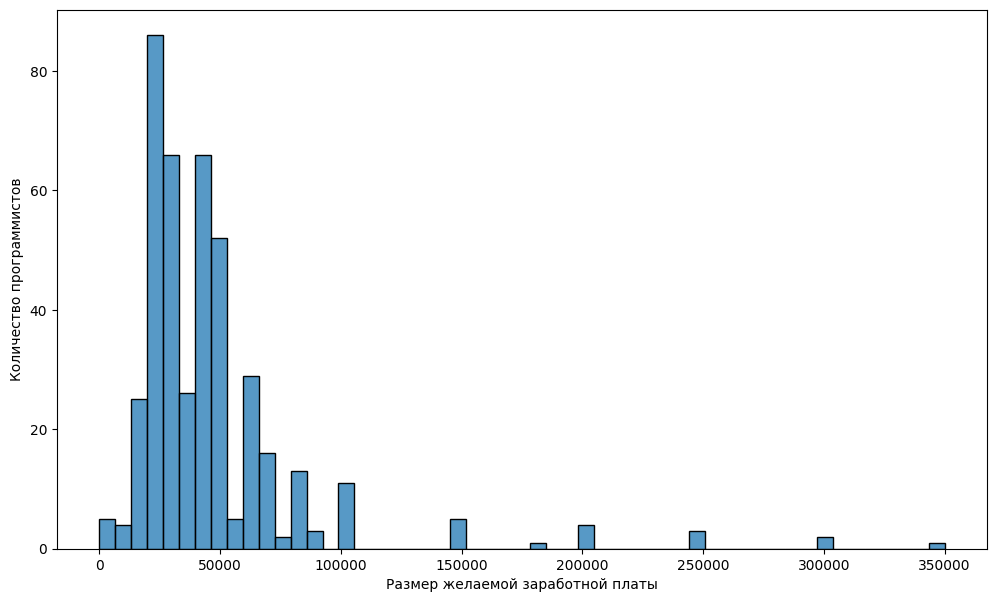

In [88]:
plt.figure(figsize=FIGSIZE)
sns.histplot(data=data_df.salary)
plt.xlabel("Размер желаемой заработной платы")
plt.ylabel("Количество программистов")
print(f"Средняя желаемая заработная плата равна {data_df.salary.mean():.2f} рублей.")
print(f"Мода равна {data_df.salary.mode().item():.0f} рублей.")
plt.show()

Наблюдаем ассиметрию в левую сторону на графике. Значение моды желаемой зарплаты равно 30 тыс. рублей.

#### Распределение признака `experience`

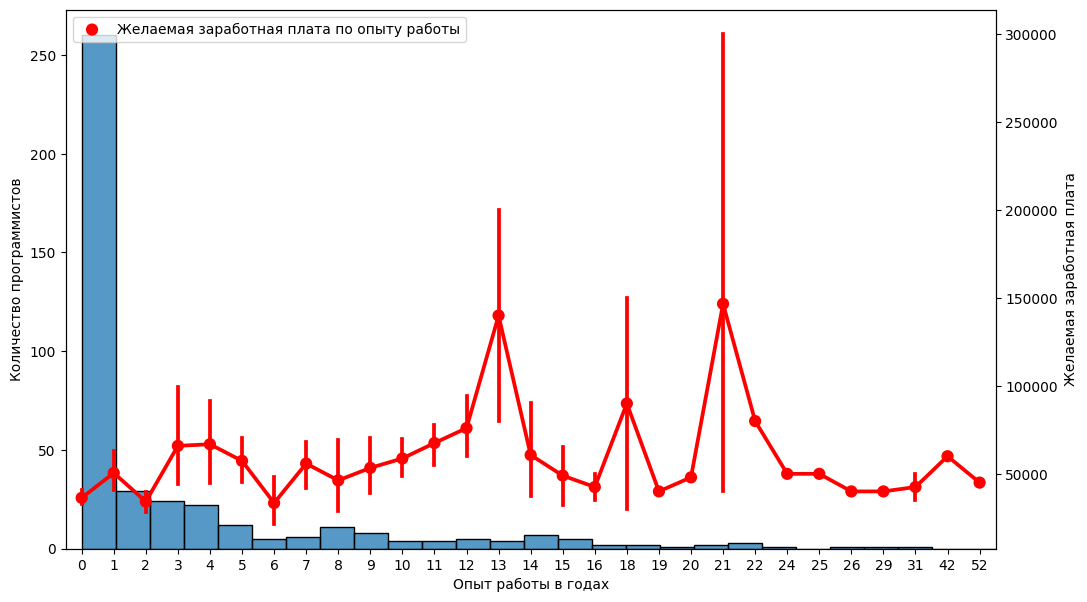

In [89]:
plt.figure(figsize=FIGSIZE)

axis = sns.histplot(data=data_df.experience)
additional_axis = axis.twinx()
sns.pointplot(
    data=data_df, 
    x="experience", 
    y="salary", 
    ax=additional_axis, 
    label="Желаемая заработная плата по опыту работы",
    color="red",
)

axis.set_xlabel("Опыт работы в годах")
axis.set_ylabel("Количество программистов")
additional_axis.set_ylabel("Желаемая заработная плата")
additional_axis.legend()
plt.show()

Также наблюдаем ассиметрию в левую сторону. Мода данного распределения - 0 лет. Интересно, что мы не можем говорить об одназначной наглядной корреляции между опытом работы и зарплатой. Желаемая зарплата сперва растет, а потом падает. 

Вероятно, падение желаемой зарплаты после отметки в 20 лет связано с тем, что программисты с таким опытом работы являются людьми 40 и более лет и, возможно, понижая требования к зарплате, они стараются оставаться конкурентно способными на "рынке программистов".

#### Распределение признака `state_region_code`

Мода распределения программистов по регионам равна 78 региону.


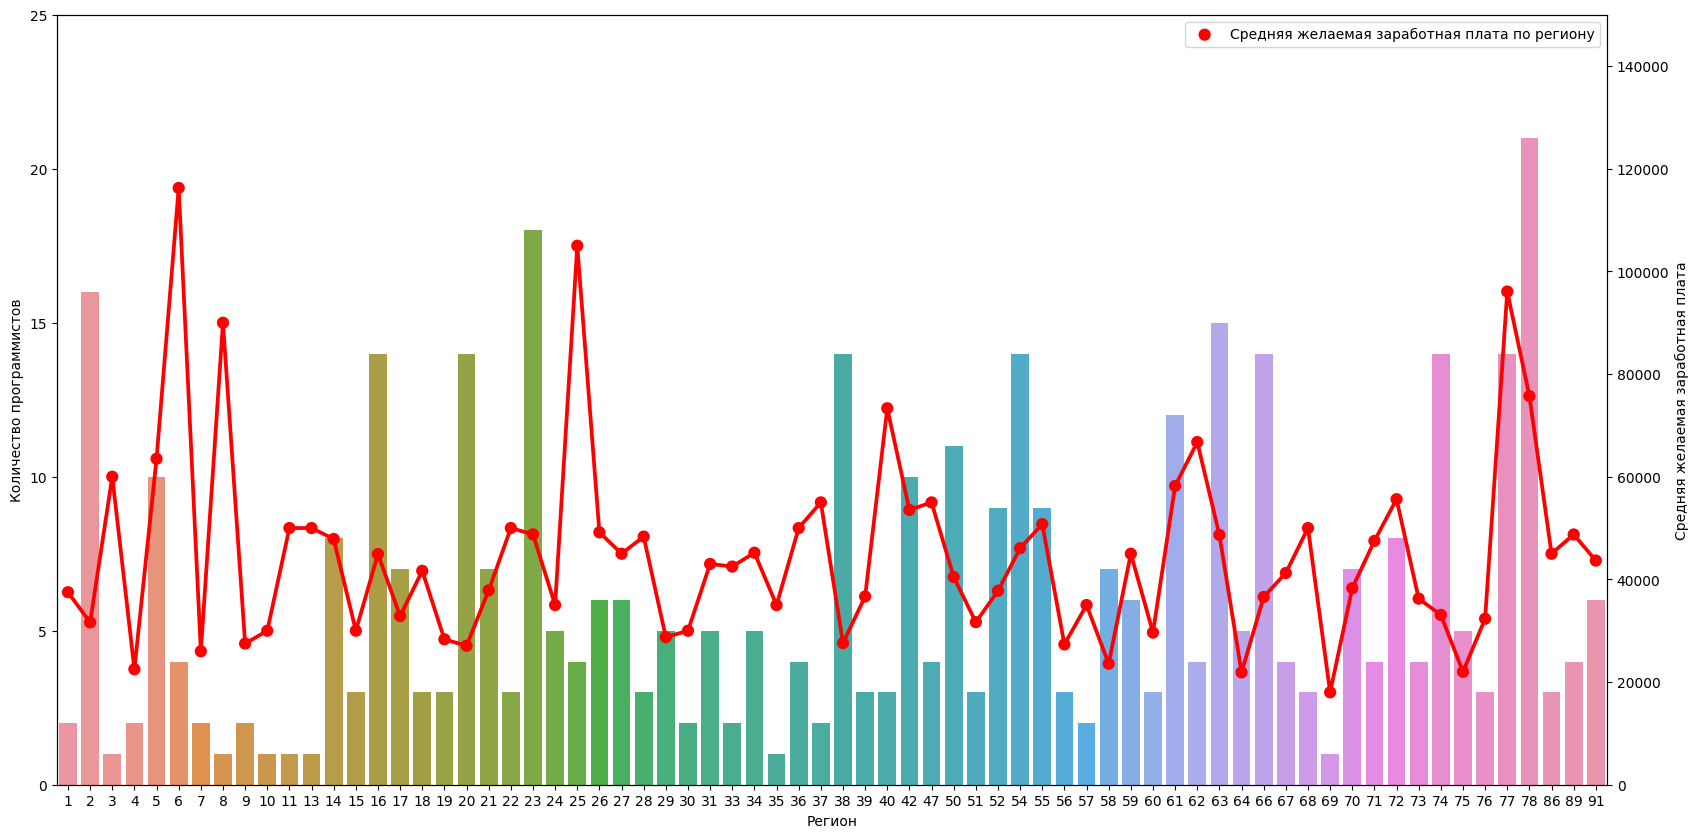

In [90]:
plt.figure(figsize=(20, 10))
state_region_to_mean_salary = data_df.groupby("state_region_code").agg({"salary": "mean"}).reset_index()

axis = sns.countplot(x="state_region_code", data=data_df)
additional_axis = axis.twinx()
sns.pointplot(
    data=state_region_to_mean_salary, 
    x="state_region_code", 
    y="salary", 
    ax=additional_axis, 
    label="Средняя желаемая заработная плата по региону",
    color="red"
)

axis.set_xlabel("Регион")
axis.set_ylabel("Количество программистов")
axis.set(ylim=(0, 25))
additional_axis.set_ylabel("Средняя желаемая заработная плата")
additional_axis.legend()
additional_axis.set(ylim=(0, 150000))
print(f"Мода распределения программистов по регионам равна {data_df.state_region_code.mode().item():.0f} региону.")
plt.show()

Глядя на график, нельзя точно определить закономерность, но можно оценить средние желаемые заработные платы в тех или иных регионах.

Разумеется, мода среди регионов по количеству программистов достается `78` региону - Санкт-Петербургу.

#### Распределение признака `busy_type`

Мода распределения программистов по типу занятости равна 'Полная-занятость'.


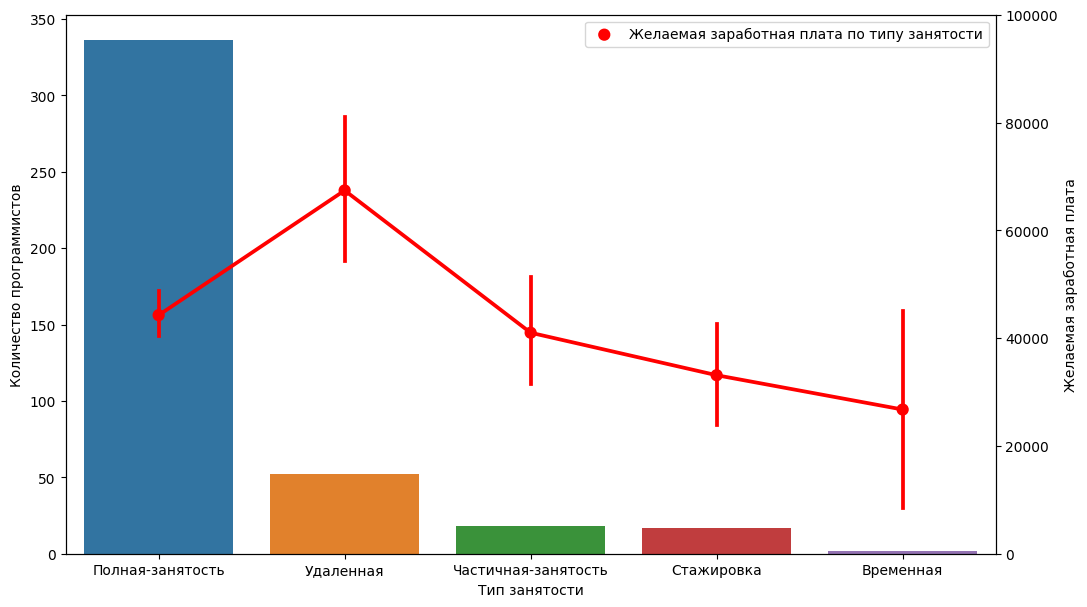

In [91]:
plt.figure(figsize=FIGSIZE)
order = data_df.busy_type.value_counts().index

axis = sns.countplot(x="busy_type", data=data_df, order=order)
additional_axis = axis.twinx()
sns.pointplot(
    data=data_df, 
    x="busy_type", 
    y="salary", 
    ax=additional_axis, 
    label="Желаемая заработная плата по типу занятости",
    color="red",
    order=order
)

axis.set_xlabel("Тип занятости")
axis.set_ylabel("Количество программистов")
additional_axis.set_ylabel("Желаемая заработная плата")
additional_axis.legend()
additional_axis.set(ylim=(0, 100000))
print(f"Мода распределения программистов по типу занятости равна '{data_df.busy_type.mode().item()}'.")
plt.show()

Как видно из графика, большинство программистов предпочитают полную занятость. С другой стороны, максимальная средняя желаемая заработная плата у тех программистов, кто предпочитает удаленный тип занятости.

#### Распределение признака `business_trip`

Мода распределения программистов по готовности к командировкам равна 'False'.


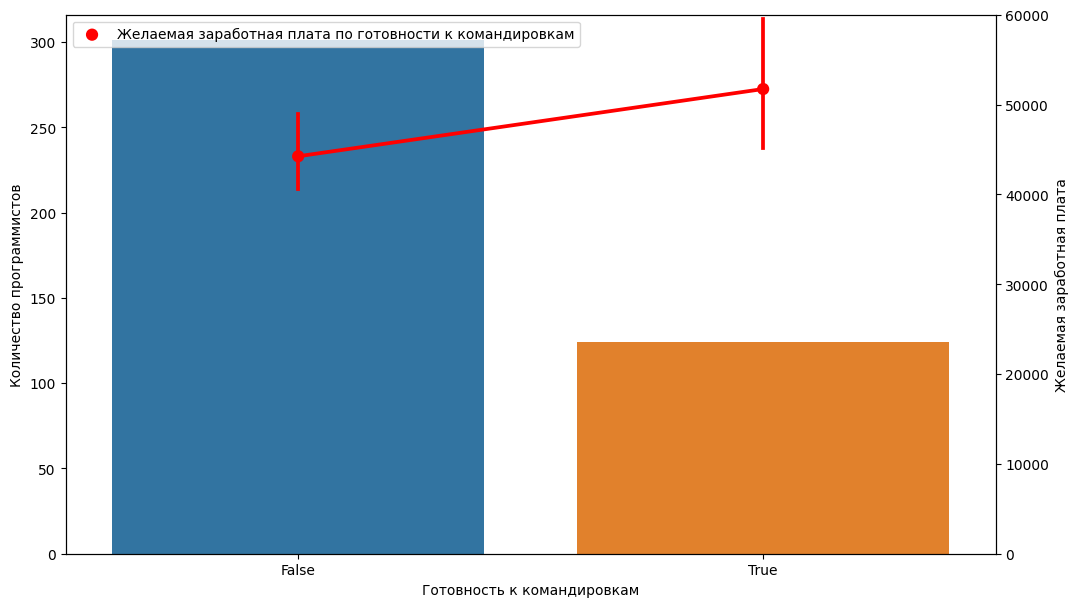

In [92]:
plt.figure(figsize=FIGSIZE)
order = data_df.business_trip.value_counts().index

axis = sns.countplot(x="business_trip", data=data_df, order=order)
additional_axis = axis.twinx()
sns.pointplot(
    data=data_df, 
    x="business_trip", 
    y="salary", 
    ax=additional_axis, 
    label="Желаемая заработная плата по готовности к командировкам",
    color="red",
    order=order
)

axis.set_xlabel("Готовность к командировкам")
axis.set_ylabel("Количество программистов")
additional_axis.set_ylabel("Желаемая заработная плата")
additional_axis.legend()
additional_axis.set(ylim=(0, 60000))
print(f"Мода распределения программистов по готовности к командировкам равна '{data_df.business_trip.mode().item()}'.")
plt.show()

Как видно из графика, те люди, кто готовы к командировкам, имеют большие требования к зарплате.

#### Распределение признака `retraining_capability`

Мода распределения программистов по готовности к переквалификации равна 'True'.


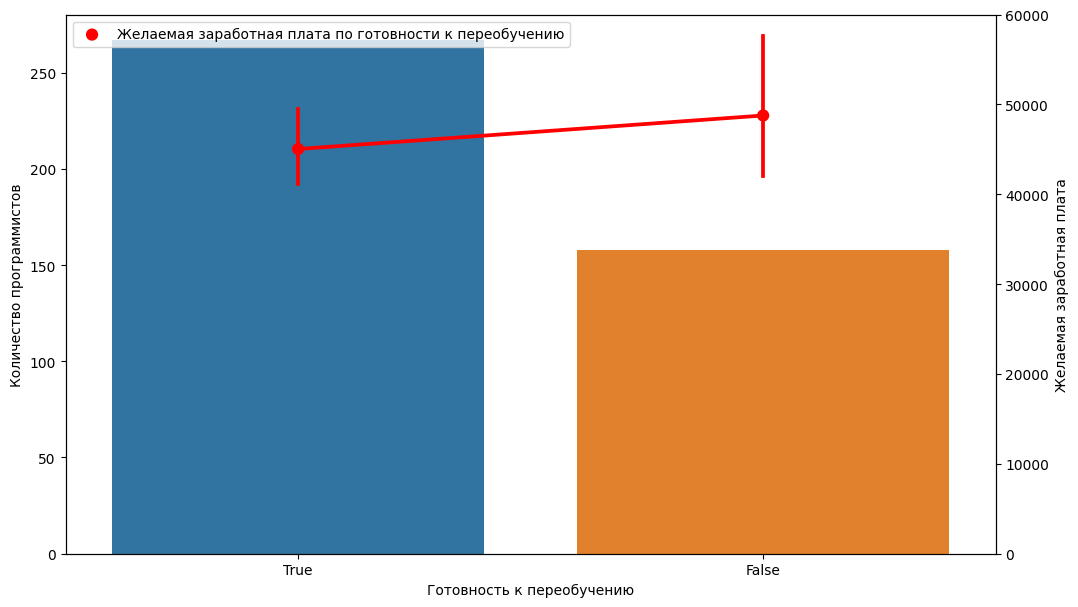

In [93]:
plt.figure(figsize=FIGSIZE)
order = data_df.retraining_capability.value_counts().index

axis = sns.countplot(x="retraining_capability", data=data_df, order=order)
additional_axis = axis.twinx()
sns.pointplot(
    data=data_df, 
    x="retraining_capability", 
    y="salary", 
    ax=additional_axis, 
    label="Желаемая заработная плата по готовности к переобучению",
    color="red",
    order=order
)

axis.set_xlabel("Готовность к переобучению")
axis.set_ylabel("Количество программистов")
additional_axis.set_ylabel("Желаемая заработная плата")
additional_axis.legend()
additional_axis.set(ylim=(0, 60000))
print(f"Мода распределения программистов по готовности к переквалификации равна '{data_df.retraining_capability.mode().item()}'.")
plt.show()

Интересное наблюдение: **те, кто не готов к переквалификации, желают большую зарплату, чем те, кто готов**. 
Скорее всего это связано с тем, что в основном люди, кто отказывается от переквалификации - специалисты в своем деле. А раз они специалисты в своем деле, значит и зарплату они будут требовать соответствующую.

#### Распределения признаков `nark_inspection_status`, `code_country`, `status`, `worldskills_inspection_status`

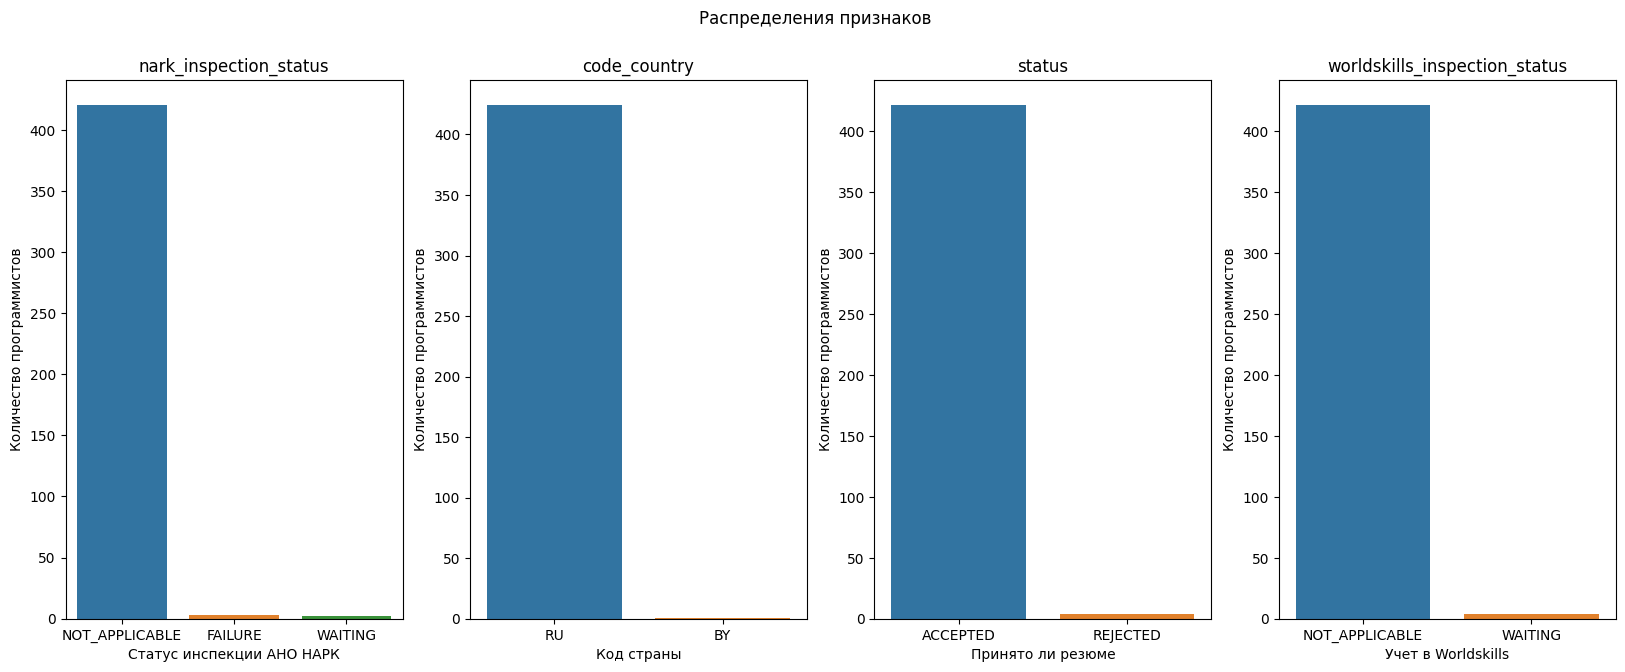

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
fig.suptitle("Распределения признаков")

sns.countplot(ax=axes[0], data=data_df, x="nark_inspection_status")
axes[0].set_title("nark_inspection_status")
axes[0].set_ylabel("Количество программистов")
axes[0].set_xlabel("Статус инспекции АНО НАРК")

sns.countplot(ax=axes[1], data=data_df, x="code_country")
axes[1].set_title("code_country")
axes[1].set_ylabel("Количество программистов")
axes[1].set_xlabel("Код страны")

sns.countplot(ax=axes[2], data=data_df, x="status")
axes[2].set_title("status")
axes[2].set_ylabel("Количество программистов")
axes[2].set_xlabel("Принято ли резюме")

sns.countplot(ax=axes[3], data=data_df, x="worldskills_inspection_status")
axes[3].set_title("worldskills_inspection_status")
axes[3].set_ylabel("Количество программистов")
axes[3].set_xlabel("Учет в Worldskills")
plt.show()

Как видно из графиков выше, подавляющее большинство программистов не принимало участия в повышении квалификации в АНО НАРК и в мероприятиях Worldskills. Также большинство программистов приняты на работу, да и к тому же большинство резюме в данном датасете - приняты на работу (если я правильно понял данный признак).

### Исследование взаимодействия переменных
Мы изучили распределения некоторых признаков датасета, а также то, как они связаны со средней желаемой заработной платой по указанной категории. Теперь мы рассмотрим как коррелируют между собой разные признаки.

Нарисуем тепловую карту корреляций.

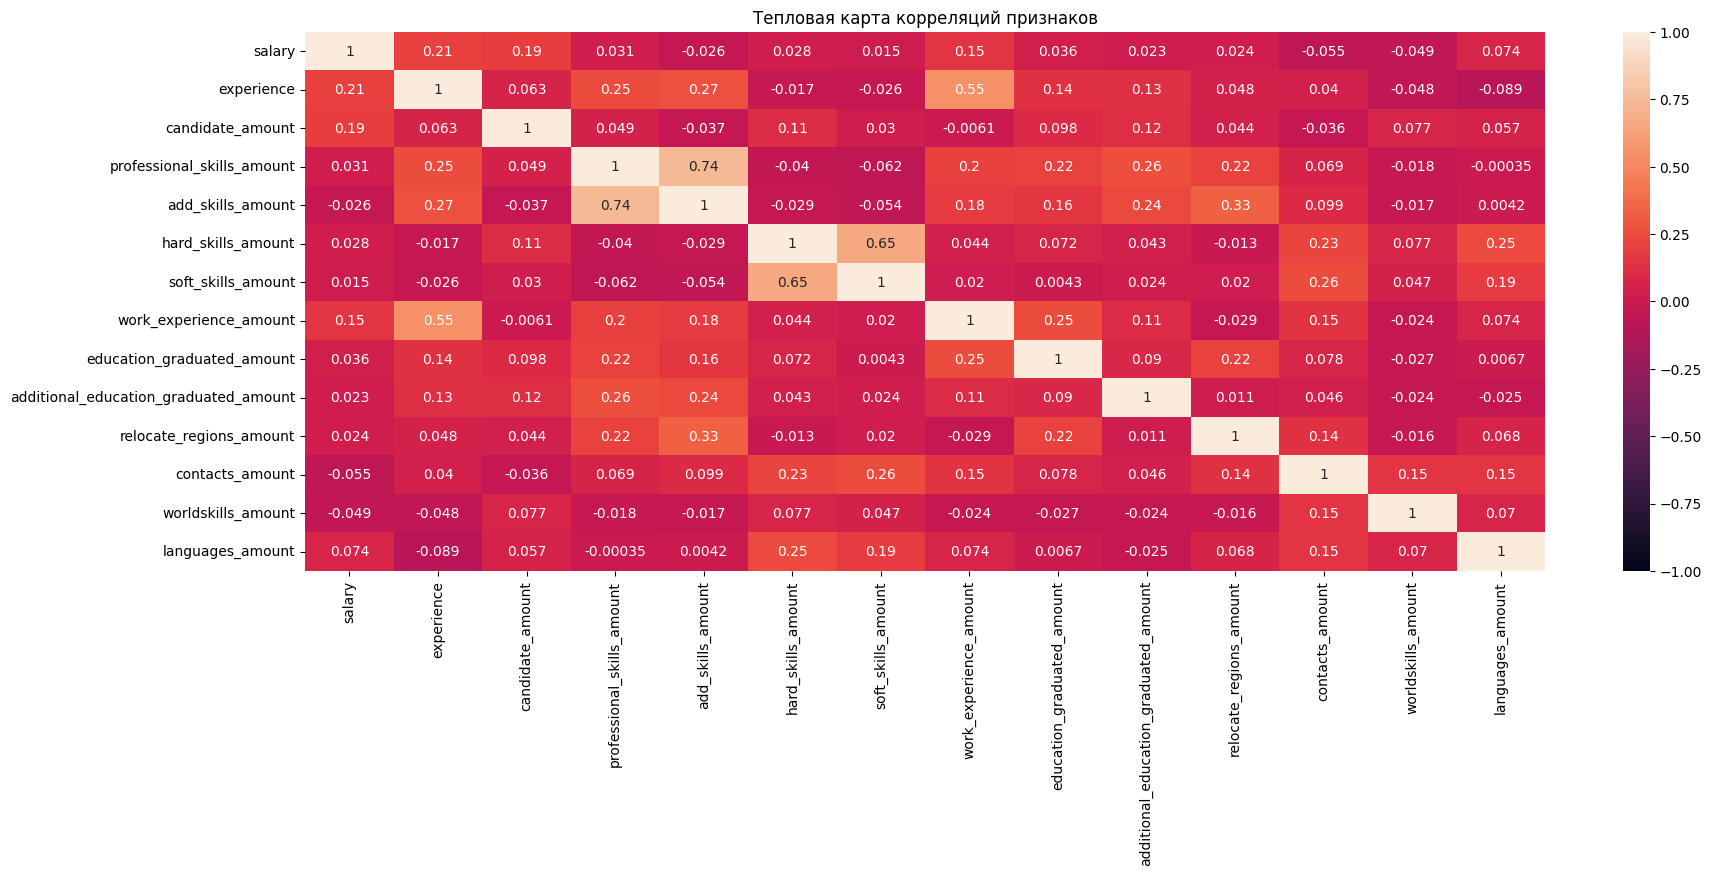

In [95]:
plt.figure(figsize=(20, 7))

sns.heatmap(data_df[
    [
        "salary", 
        "experience",
        "candidate_amount",
        "professional_skills_amount",
        "add_skills_amount",
        "hard_skills_amount",
        "soft_skills_amount",
        "work_experience_amount",
        "education_graduated_amount",
        "additional_education_graduated_amount",
        "relocate_regions_amount",
        "contacts_amount",
        "worldskills_amount",
        "languages_amount"
    ]].corr(),
    vmin=-1,
    vmax=1,
    annot=True).set_title("Тепловая карта корреляций признаков")
plt.show()

Как видно из теплокарты выше, у нас действительно есть некоторые корреляции признаков датасета с признаком `salary`, хоть и имеющие низкое абсолютное значение. Однако также есть признаки, которые неизвестно почему, но коррелируют с желаемой зарплатой в обратную сторону, например `add_skills_amount` и `contacts_amount`.

Также стоит заметить, что у нас есть и те признаки, которые сильно коррелируют между собой, например `profession_skills_amount` и `add_skills_amount` или `work_experience_amount` и `experience`.

Попробуем понять характер зависимости переменных друг с другом с помощью парных графиков.

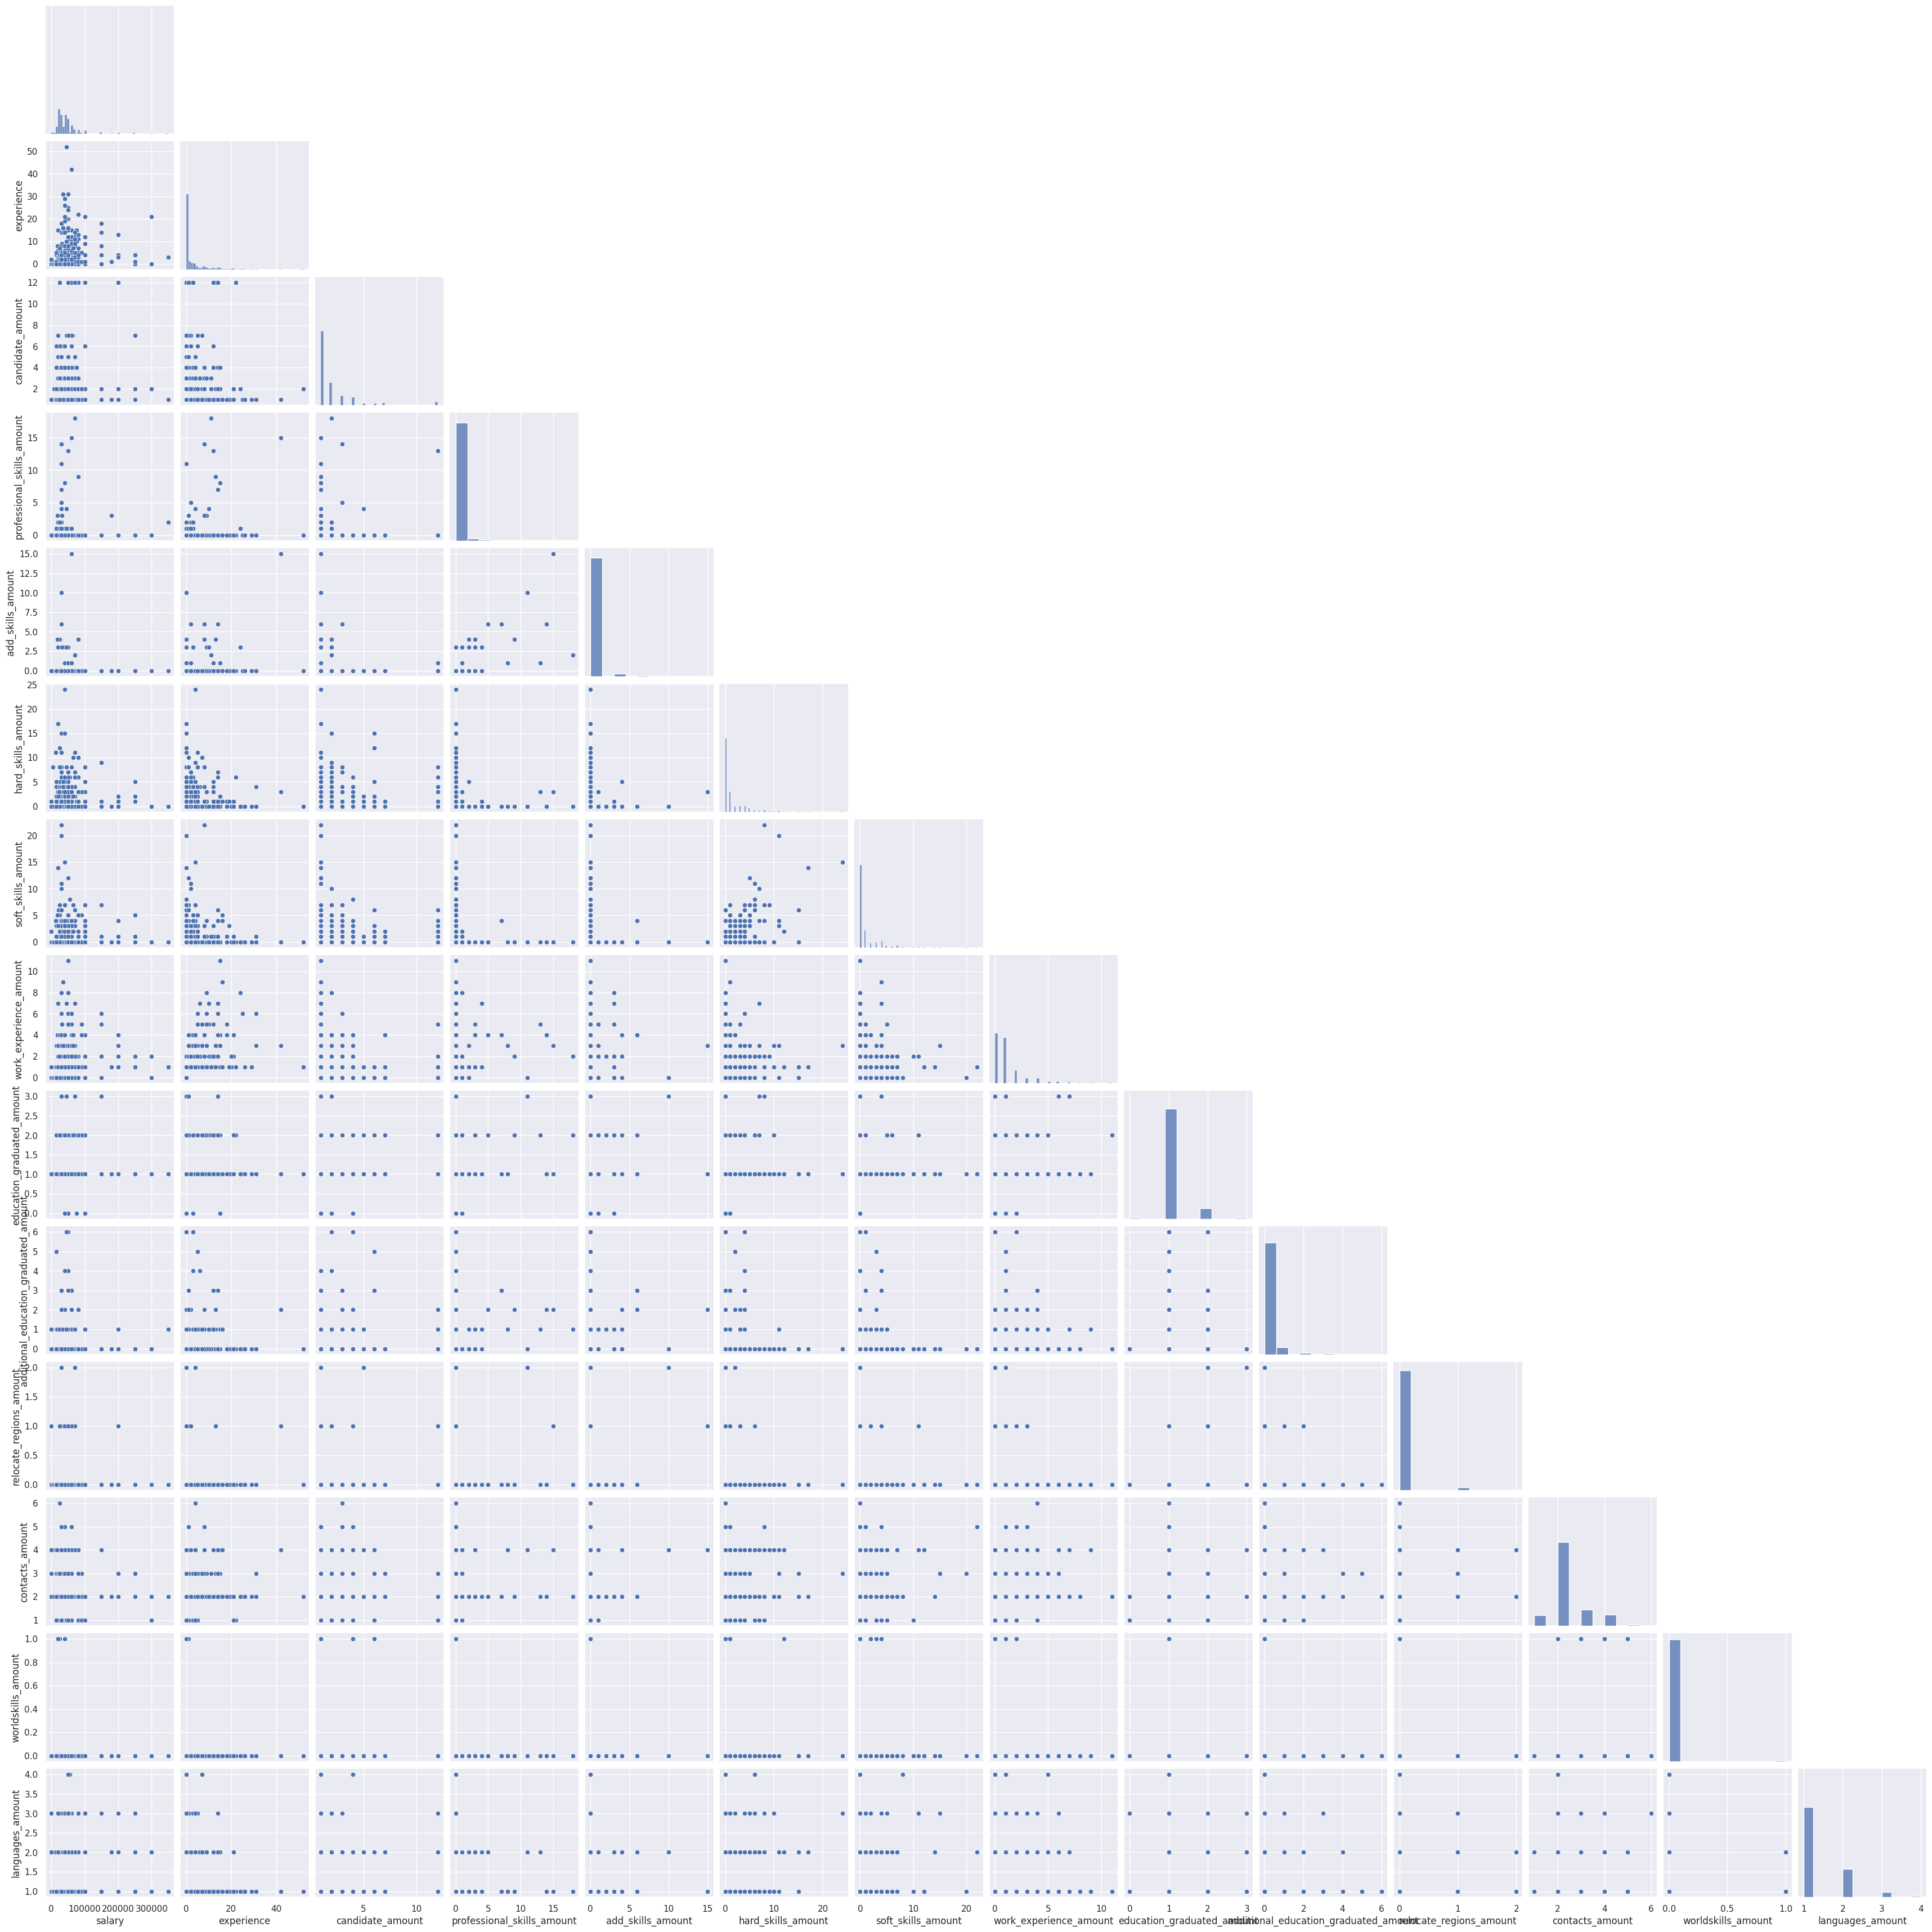

In [96]:
sns.set_theme()
sns.pairplot(
    data_df[
    [
        "salary", 
        "experience",
        "candidate_amount",
        "professional_skills_amount",
        "add_skills_amount",
        "hard_skills_amount",
        "soft_skills_amount",
        "work_experience_amount",
        "education_graduated_amount",
        "additional_education_graduated_amount",
        "relocate_regions_amount",
        "contacts_amount",
        "worldskills_amount",
        "languages_amount"
    ]],
    corner=True
)

Данный график содержит в себе чрезвычайно много информации о характере взаимодействия переменных друг с другом. Однако обратим внимание на переменную `salary`. Как можно заметить из графика, видно, что явных корреляций с другими переменными переменная о желаемой заработной плате не имеет.

## Предиктивная модель
Ранее мы провели предобработку датасета и анализ признаков. В данной главе мы наконец займемся построением предиктивной модели.

### Подготовка датасета для обучения
Перед тем, как скармливать наш датасет для обучения, его необходимо подготовить к обучению.

#### Категориальные признаки
Для всех категориальных признаков мы применим [one-hot-encoding](https://en.wikipedia.org/wiki/One-hot), чтобы из нечисловых типов перейти к числовым.

In [97]:
data_df.columns

Index(['abilympics_participation', 'worldskills_inspection_status',
       'state_region_code', 'position_name', 'home_city_code', 'education',
       'code_country', 'nark_inspection_status', 'nark_certificate',
       'experience', 'salary', 'busy_type', 'business_trip',
       'retraining_capability', 'status', 'fullness_rate', 'candidate_amount',
       'drive_licence_a_category', 'drive_licence_b_category',
       'drive_licence_c_category', 'schedule_watch', 'schedule_flexible',
       'schedule_irregular', 'schedule_part_time', 'schedule_full_time',
       'schedule_shift', 'professional_skills_amount', 'add_skills_amount',
       'has_other_certificates', 'has_other_info', 'work_experience_amount',
       'education_graduated_amount', 'additional_education_graduated_amount',
       'relocate_regions_amount', 'contacts_amount', 'worldskills_amount',
       'languages_amount', 'hard_skills_amount', 'soft_skills_amount'],
      dtype='object')

In [98]:
data_df = pd.get_dummies(
    data=data_df,
    columns=[
        "abilympics_participation",
        'worldskills_inspection_status',
        "state_region_code",
        'position_name',
        'home_city_code',
        'education',
        'code_country',
        'nark_inspection_status',
        'nark_certificate',
        'busy_type',
        'business_trip',
        'status',
        'fullness_rate',
    ])

data_df.shape

(425, 539)

#### Разбиение датасета
Для обучения и последующей оценки модели необходимо разбить датасет на тренировочную и тестовую выборку.

In [99]:
from sklearn.model_selection import train_test_split

X = data_df.drop(["salary"], axis=1)
y = data_df.salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_SEED) 
# 15% всей выборки - контрольная выборка. Более чем достаточно для проверки качества модели. 

#### Обучение модели
В нашем случае мы решаем задачу регрессии: т.е. отображение на непрерывное множество значений (если говорить точнее, предсказываем значение `salary`, что является числом).
В нашей тренировочной выборке содержится 539 свойств, далеко не все из которых (вероятнее всего) имеют вклад в предсказание или имеют даже "вредное" влияние на наше предсказание.

В качестве модели предсказания была выбрана модель градиентного бустинга. Обучение будет производиться с применением 5-fold кросс-валидации. Также мы воспользуемся `RandomizedSearchCV`, чтобы подобрать как можно лучшие параметры для нашей модели.

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
parameters = {
    "loss": ["squared_error", "absolute_error"],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": range(1, 100, 10),
}

search = RandomizedSearchCV(reg, parameters, cv=5, n_jobs=-1, random_state=RANDOM_SEED)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'n_estimators': range(1, 100, 10)},
                   random_state=42)

#### Оценка модели.
Посчитаем **потери** данной модели на тестовых данных, например среднюю абсолютную ошибку (MAE).

In [104]:
from sklearn.metrics import mean_absolute_error
reg = search.best_estimator_

y_pred = reg.predict(X_test)
mae_value = mean_absolute_error(y_test, y_pred)
rmse_value = mean_squared_error(y_test, y_pred, squared=False)

mae_value

19524.146538435973

По итогу обучения модели нам удалось достичь MAE в ~19500. Это означает, что в среднем мы ошибаемся на ~19500 рублей при предсказании, если строим модель на всех тех данных, которые нам предоставлены.

Такой низкий результат можно оправдать тем, что в датасете нет тех переменных, которые бы сильно коррелировали с нашей предсказываемой переменной. Максимальное абсолютное значение корреляции для `salary` - это 0.21 с признаком `experience`, что в целом, очевидно почему имеет положительную корреляцию, но не ясно, почему столь низкую. 

#### Значимые переменные
Взглянем на те переменные, которые имеют максимальный вклад в наше предсказание.

In [105]:
feature_importances = reg.feature_importances_
feature_description = pd.DataFrame({
    "features": X_train.columns,
    "importance_value": feature_importances
}).sort_values("importance_value", ascending=False)
feature_description.head(10)

,features,importance_value
468,education_Высшее,0.199343
0,experience,0.162598
2,candidate_amount,0.076499
506,fullness_rate_66,0.055979
13,add_skills_amount,0.030674
470,education_Среднее,0.029085
482,busy_type_Удаленная,0.029007
494,fullness_rate_54,0.024671
16,work_experience_amount,0.018495
18,additional_education_graduated_amount,0.018065


Самый большой вклад в наше предсказание имеет факт наличия высшего образования у программиста, опыт его работы, а также количество кандидатур в разные компании.

# Выводы

В ходе выполнения данного тестового задания, испытуемым было проведено:
1. **Анализ датасета**: исследование и осмысление переменных, исследование зависимостей между разными переменными.
2. **Предобработка датасета**: заполнение пропущенных значений, создание новых и удаление ненужных признаков.
3. **Обучение предиктивной модели**: для данной задачи удалось обучить регрессионную модель **градиентного бустинга с MAE равной ~19500 руб**. 

Исходя из обученной модели, **самыми важными переменными**, от которых зависит успешное предсказание желаемой заработной платы, являются:
- Наличие высшего образования
- Опыт работы
- Количество кандидатур в разные компании